In [227]:
from cropnet.data_downloader import DataDownloader
import os
from herbie import Herbie
from datetime import datetime

# Use the "target_dir" to specify where the data should be downloaded to
downloader = DataDownloader(target_dir="./data")

# Download 2022 USDA Soybean data
# Note that most of the 2023 USDA data are not yet available
downloader.download_USDA("Soybean", fips_codes=["10003", "22007"], years=["2022"])

# Download the 2023 (the 1st and 2nd quarters) Sentinel-2 Imagery
downloader.download_Sentinel2(fips_codes=["10003", "22007"], years=["2023"], image_type="AG")
downloader.download_Sentinel2(fips_codes=["10003", "22007"], years=["2023"], image_type="NDVI")


# --- CONFIG ---
fips_codes = {
    "10003": "DE",  # Delaware - New Castle
    "22007": "LA",  # Louisiana - Assumption
}
date = "2023-01-01"
forecast_hour = "f00"  # Initial forecast only

# --- MAIN ---
for fips, state in fips_codes.items():
    output_dir = f"data/HRRR/realtime_wrf/2023/20230101"

    # Forecast times: 00 UTC to 23 UTC
    for hour in range(24):
        run_time = datetime.strptime(f"{date} {hour:02d}", "%Y-%m-%d %H")

        # Initialize Herbie
        H = Herbie(
            date=run_time,
            model="hrrr",
            product="sfc",
            fxx=0,  # f00 forecast
            save_dir=output_dir,
            verbose=True,
        )

        # Define output filename
        filename = f"hrrr.{date.replace('-', '')}.{hour:02d}.00.grib2"
        file_path = os.path.join(output_dir, filename)

        # Skip if file exists
        if os.path.exists(file_path):
            print(f"✅ File exists, skipping: {file_path}")
            continue

        # Download the file
        try:
            # Download and get the original file path
            downloaded_file = H.download()

            if downloaded_file and os.path.exists(downloaded_file):
                final_path = os.path.join(output_dir, f"hrrr.{run_time:%Y%m%d}.{run_time:%H}.00.grib2")
                os.rename(downloaded_file, final_path)
                print(f"✅ Renamed: {downloaded_file} -> {final_path}")
            else:
                print(f"⚠️ File not found after download: {downloaded_file}")
        except Exception as e:
            print(f"❌ Failed at {file_path}: {e}")



Progress: [ 1/1 ], Downloading USDA Data, Year: 2022, Crop: Soybean


KeyboardInterrupt: 

In [ ]:
# Use the "base_fir" to specify where the CropNet data is stored
retriever = DataRetriever(base_dir="/mnt/data/CropNet")
   
# Retrieve the 2022 USDA Soybean data
usda_data = retriever.retrieve_USDA(crop_type="Soybean", fips_codes=["10003", "22007"], years=["2022"])
   
# Retrieve the 2022 Sentinel-2 Imagery data
sentinel2_data = retriever.retrieve_Sentinel2(fips_codes=["10003", "22007"], years=["2022"], image_type="AG")
sentinel2_data = retriever.retrieve_Sentinel2(fips_codes=["10003", "22007"], years=["2022"], image_type="NDVI")
   
# Retrieve the 2022 WRF-HRRR data
hrrr_data = retriever.retrieve_HRRR(fips_codes=["10003","22007"], years=["2022"])

NameError: name 'DataRetriever' is not defined

In [246]:
import pandas as pd

# Read the USDA Corn County 2022 data
usda_corn_path = '/Users/RavenMott1/Downloads/Cropnet/data/USDA Crop Dataset/data/Corn/2022/USDA_Corn_County_2022.csv'
usda_corn_df = pd.read_csv(usda_corn_path)

# Read the HRRR computed data for AL, March 2022
hrrr_march_path = '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 7/data/2022/AL/HRRR_01_AL_2022-03.csv'
hrrr_march_df = pd.read_csv(hrrr_march_path)

In [247]:
usda_corn_df.head()


commodity_desc reference_period_desc  year  state_ansi state_name  \
0           CORN                  YEAR  2022           1    ALABAMA   
1           CORN                  YEAR  2022           1    ALABAMA   
2           CORN                  YEAR  2022           1    ALABAMA   
3           CORN                  YEAR  2022           1    ALABAMA   
4           CORN                  YEAR  2022           1    ALABAMA   

   county_ansi county_name  asd_code                     asd_desc domain_desc  \
0            3     BALDWIN        50  COASTAL PLAINS & GULF COAST       TOTAL   
1            5     BARBOUR        60                    WIREGRASS       TOTAL   
2            9      BLOUNT        20   MOUNTAINS & EASTERN VALLEY       TOTAL   
3           15     CALHOUN        20   MOUNTAINS & EASTERN VALLEY       TOTAL   
4           19    CHEROKEE        20   MOUNTAINS & EASTERN VALLEY       TOTAL   

  source_desc agg_level_desc  PRODUCTION, MEASURED IN BU  \
0      SURVEY         COUNTY                   1020000.0   
1      SURVEY         COUNTY                    262000.0   
2      SURVEY         COUNTY                    242000.0   
3      SURVEY         COUNTY                    319000.0   
4      SURVEY         COUNTY                    633000.0   

   YIELD, MEASURED IN BU / ACRE  
0                         139.0  
1                         159.8  
2                         100.4  
3                         142.4  
4                         138.5

In [248]:
usda_corn_df.tail()

commodity_desc reference_period_desc  year  state_ansi state_name  \
1511           CORN                  YEAR  2022          55  WISCONSIN   
1512           CORN                  YEAR  2022          55  WISCONSIN   
1513           CORN                  YEAR  2022          55  WISCONSIN   
1514           CORN                  YEAR  2022          55  WISCONSIN   
1515           CORN                  YEAR  2022          55  WISCONSIN   

      county_ansi county_name  asd_code      asd_desc domain_desc source_desc  \
1511          133    WAUKESHA        90     SOUTHEAST       TOTAL      SURVEY   
1512          135     WAUPACA        50       CENTRAL       TOTAL      SURVEY   
1513          137    WAUSHARA        50       CENTRAL       TOTAL      SURVEY   
1514          139   WINNEBAGO        60  EAST CENTRAL       TOTAL      SURVEY   
1515          141        WOOD        50       CENTRAL       TOTAL      SURVEY   

     agg_level_desc  PRODUCTION, MEASURED IN BU  YIELD, MEASURED IN BU / ACRE  
1511         COUNTY                   3493000.0                         181.0  
1512         COUNTY                   6588000.0                         175.2  
1513         COUNTY                   5800000.0                         174.7  
1514         COUNTY                   5862000.0                         171.9  
1515         COUNTY                   4312000.0                         167.8

In [249]:
hrrr_march_df.head()


Year  Month  Day Daily/Monthly    State   County  FIPS Code  Grid Index  \
0  2022      3  1.0         Daily  ALABAMA  AUTAUGA       1001         0.0   
1  2022      3  2.0         Daily  ALABAMA  AUTAUGA       1001         0.0   
2  2022      3  3.0         Daily  ALABAMA  AUTAUGA       1001         0.0   
3  2022      3  4.0         Daily  ALABAMA  AUTAUGA       1001         0.0   
4  2022      3  5.0         Daily  ALABAMA  AUTAUGA       1001         0.0   

   Lat (llcrnr)  Lon (llcrnr)  ...  Max Temperature (K)  Min Temperature (K)  \
0     32.340803    -86.917595  ...              294.298              274.949   
1     32.340803    -86.917595  ...              298.036              273.700   
2     32.340803    -86.917595  ...              298.460              275.565   
3     32.340803    -86.917595  ...              301.517              276.623   
4     32.340803    -86.917595  ...              301.180              281.089   

   Precipitation (kg m**-2)  Relative Humidity (%)  Wind Gust (m s**-1)  \
0                       0.0                   54.8                2.544   
1                       0.0                   55.8                1.832   
2                       0.0                   55.7                2.034   
3                       0.0                   50.2                2.460   
4                       0.0                   52.4                5.587   

   Wind Speed (m s**-1)  U Component of Wind (m s**-1)  \
0                 4.196                          0.270   
1                 2.132                          1.848   
2                 2.748                          2.565   
3                 2.383                          0.238   
4                 6.994                         -1.547   

   V Component of Wind (m s**-1)  Downward Shortwave Radiation Flux (W m**-2)  \
0                         -3.479                                       5848.2   
1                         -0.676                                       5893.6   
2                          0.303                                       5891.3   
3                         -0.048                                       5915.7   
4                          6.306                                       5592.2   

   Vapor Pressure Deficit (kPa)  
0                         0.779  
1                         0.933  
2                         1.000  
3                         1.228  
4                         1.147  

[5 rows x 23 columns]

In [250]:
hrrr_march_df.tail()
print("Unique counties:", hrrr_march_df["County"].unique())
print("Number of unique counties:", hrrr_march_df["County"].nunique())

Unique counties: ['AUTAUGA' 'BALDWIN' 'BARBOUR' 'BIBB' 'BLOUNT' 'BULLOCK' 'BUTLER'
 'CALHOUN' 'CHAMBERS' 'CHEROKEE' 'CHILTON' 'CHOCTAW' 'CLARKE' 'CLAY'
 'CLEBURNE' 'COFFEE' 'COLBERT' 'CONECUH' 'COOSA' 'COVINGTON' 'CRENSHAW'
 'CULLMAN' 'DALE' 'DALLAS' 'DEKALB' 'ELMORE' 'ESCAMBIA' 'ETOWAH' 'FAYETTE'
 'FRANKLIN' 'GENEVA' 'GREENE' 'HALE' 'HENRY' 'HOUSTON' 'JACKSON'
 'JEFFERSON' 'LAMAR' 'LAUDERDALE' 'LAWRENCE' 'LEE' 'LIMESTONE' 'LOWNDES'
 'MACON' 'MADISON' 'MARENGO' 'MARION' 'MARSHALL' 'MOBILE' 'MONROE'
 'MONTGOMERY' 'MORGAN' 'PERRY' 'PICKENS' 'PIKE' 'RANDOLPH' 'RUSSELL'
 'SHELBY' 'ST. CLAIR' 'SUMTER' 'TALLADEGA' 'TALLAPOOSA' 'TUSCALOOSA'
 'WALKER' 'WASHINGTON' 'WILCOX' 'WINSTON']
Number of unique counties: 67


In [251]:
# Number of rows and columns
print("usda_corn_df shape:", usda_corn_df.shape)
print("hrrr_march_df shape:", hrrr_march_df.shape)

# Data types
print("\nusda_corn_df data types:\n", usda_corn_df.dtypes)
print("\nhrrr_march_df data types:\n", hrrr_march_df.dtypes)

# Check for missing values
print("\nusda_corn_df missing values:\n", usda_corn_df.isnull().sum())
print("\nhrrr_march_df missing values:\n", hrrr_march_df.isnull().sum())

# Quick summary of categorical and numerical columns
print("\nusda_corn_df categorical columns:", usda_corn_df.select_dtypes(include='object').columns.tolist())
print("usda_corn_df numerical columns:", usda_corn_df.select_dtypes(include=['number']).columns.tolist())

print("\nhrrr_march_df categorical columns:", hrrr_march_df.select_dtypes(include='object').columns.tolist())
print("hrrr_march_df numerical columns:", hrrr_march_df.select_dtypes(include=['number']).columns.tolist())


usda_corn_df shape: (1516, 14)
hrrr_march_df shape: (48799, 23)

usda_corn_df data types:
 commodity_desc                   object
reference_period_desc            object
year                              int64
state_ansi                        int64
state_name                       object
county_ansi                       int64
county_name                      object
asd_code                          int64
asd_desc                         object
domain_desc                      object
source_desc                      object
agg_level_desc                   object
PRODUCTION, MEASURED IN BU      float64
YIELD, MEASURED IN BU / ACRE    float64
dtype: object

hrrr_march_df data types:
 Year                                             int64
Month                                            int64
Day                                            float64
Daily/Monthly                                   object
State                                           object
County                          

In [252]:
# Data Cleaning and Standardization
# --- 1. Filter for Alabama ---
usda_corn_df = usda_corn_df[usda_corn_df["state_name"].str.upper() == "ALABAMA"]

# --- 2. Standardize county/state names (uppercase, no extra spaces) ---
def standardize_location_names(df, county_col="County", state_col="State"):
    if county_col in df.columns:
        df[county_col] = df[county_col].astype(str).str.strip().str.upper()
    if state_col in df.columns:
        df[state_col] = df[state_col].astype(str).str.strip().str.upper()
    return df

usda_corn_df = standardize_location_names(usda_corn_df, county_col="county_name", state_col="state_name")
hrrr_march_df = standardize_location_names(hrrr_march_df, county_col="County", state_col="State")

# --- 3. Convert temperature values from Kelvin to Celsius ---
temp_k_map = {
    "Avg Temperature (K)": "Avg Temperature (C)",
    "Max Temperature (K)": "Max Temperature (C)",
    "Min Temperature (K)": "Min Temperature (C)"
}
for k_col, c_col in temp_k_map.items():
    if k_col in hrrr_march_df.columns:
        hrrr_march_df[c_col] = hrrr_march_df[k_col] - 273.15
        # Optionally remove the original Kelvin column
        del hrrr_march_df[k_col]

# --- 4. Split daily and monthly data into separate DataFrames ---
# Identify rows where "Daily/Monthly" is "Monthly"
is_monthly = hrrr_march_df["Daily/Monthly"].str.upper() == "MONTHLY"
# Create a new DataFrame for monthly data
hrrr_march_monthly_df = hrrr_march_df[is_monthly].reset_index(drop=True)
# Remove monthly rows from the original DataFrame (keep only daily)
hrrr_march_df = hrrr_march_df[~is_monthly].reset_index(drop=True)

# Remove the "Daily/Monthly" column from both DataFrames if present
for df in [hrrr_march_df, hrrr_march_monthly_df]:
    if "Daily/Monthly" in df.columns:
        del df["Daily/Monthly"]

# Add "date" column for daily data if year, month, day columns exist
if all(col in hrrr_march_df.columns for col in ["Year", "Month", "Day"]):
    hrrr_march_df["Date"] = pd.to_datetime(hrrr_march_df[["Year", "Month", "Day"]], errors="coerce")

# Add "date" column for monthly data if year and month columns exist
if all(col in hrrr_march_monthly_df.columns for col in ["Year", "Month"]):
    # Assign day=1 for all rows to allow conversion to datetime
    hrrr_march_monthly_df["Date"] = pd.to_datetime(
        dict(
            year=hrrr_march_monthly_df["Year"],
            month=hrrr_march_monthly_df["Month"],
            day=1
        ),
        errors="coerce"
    )
# Group by county and compute the mean of each variable for daily HRRR data, keeping the State column
# Now, group by State, County, and Date to keep daily granularity
hrrr_march_df = hrrr_march_df.groupby(["State", "County", "Date"], as_index=False).mean(numeric_only=True)


# Fips column for usda_corn_df using state_ansi and county_ansi
usda_corn_df["FIPS"] = usda_corn_df["state_ansi"].astype(str).str.zfill(2) + usda_corn_df["county_ansi"].astype(str).str.zfill(3)
# Standardize FIPS codes in HRRR data to match USDA (5-digit, zero-padded string)
for df in [hrrr_march_df, hrrr_march_monthly_df]:
    if "FIPS Code" in df.columns:
        df["FIPS"] = df["FIPS Code"].astype(int).astype(str).str.zfill(5)

# --- 5. Remove unnecessary columns ---
remove_cols = ["Lat (llcrnr)", "Lon (llcrnr)", "Lat (urcrnr)", "Lon (urcrnr)","Year", "Month", "Day", "Daily/Monthly", "state_ansi", "county_ansi", "FIPS Code","Grid Index", "Grid Index (Monthly)"]
for df in [hrrr_march_df, hrrr_march_monthly_df, usda_corn_df]:
    for col in remove_cols:
        if col in df.columns:
            del df[col]

 


In [253]:
usda_corn_df.head()

commodity_desc reference_period_desc  year state_name county_name  asd_code  \
0           CORN                  YEAR  2022    ALABAMA     BALDWIN        50   
1           CORN                  YEAR  2022    ALABAMA     BARBOUR        60   
2           CORN                  YEAR  2022    ALABAMA      BLOUNT        20   
3           CORN                  YEAR  2022    ALABAMA     CALHOUN        20   
4           CORN                  YEAR  2022    ALABAMA    CHEROKEE        20   

                      asd_desc domain_desc source_desc agg_level_desc  \
0  COASTAL PLAINS & GULF COAST       TOTAL      SURVEY         COUNTY   
1                    WIREGRASS       TOTAL      SURVEY         COUNTY   
2   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY         COUNTY   
3   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY         COUNTY   
4   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY         COUNTY   

   PRODUCTION, MEASURED IN BU  YIELD, MEASURED IN BU / ACRE   FIPS  
0                   1020000.0                         139.0  01003  
1                    262000.0                         159.8  01005  
2                    242000.0                         100.4  01009  
3                    319000.0                         142.4  01015  
4                    633000.0                         138.5  01019

In [254]:
usda_corn_df.tail()

commodity_desc reference_period_desc  year state_name county_name  \
27           CORN                  YEAR  2022    ALABAMA       PERRY   
28           CORN                  YEAR  2022    ALABAMA    RANDOLPH   
29           CORN                  YEAR  2022    ALABAMA     RUSSELL   
30           CORN                  YEAR  2022    ALABAMA   TALLADEGA   
31           CORN                  YEAR  2022    ALABAMA  TUSCALOOSA   

    asd_code                 asd_desc domain_desc source_desc agg_level_desc  \
27        40               BLACK BELT       TOTAL      SURVEY         COUNTY   
28        30  UPPER PLAINS & PIEDMONT       TOTAL      SURVEY         COUNTY   
29        60                WIREGRASS       TOTAL      SURVEY         COUNTY   
30        30  UPPER PLAINS & PIEDMONT       TOTAL      SURVEY         COUNTY   
31        30  UPPER PLAINS & PIEDMONT       TOTAL      SURVEY         COUNTY   

    PRODUCTION, MEASURED IN BU  YIELD, MEASURED IN BU / ACRE   FIPS  
27                    434000.0                          68.0  01105  
28                    131500.0                         139.9  01111  
29                     60500.0                          99.2  01113  
30                    824000.0                         154.9  01121  
31                    256000.0                         120.8  01125

In [255]:
hrrr_march_df.head()

State   County       Date  Precipitation (kg m**-2)  \
0  ALABAMA  AUTAUGA 2022-03-01                       0.0   
1  ALABAMA  AUTAUGA 2022-03-02                       0.0   
2  ALABAMA  AUTAUGA 2022-03-03                       0.0   
3  ALABAMA  AUTAUGA 2022-03-04                       0.0   
4  ALABAMA  AUTAUGA 2022-03-05                       0.0   

   Relative Humidity (%)  Wind Gust (m s**-1)  Wind Speed (m s**-1)  \
0              48.620000             3.525933              3.925267   
1              46.280000             2.025867              1.900467   
2              47.480000             2.543533              2.523067   
3              43.913333             2.949533              2.292333   
4              51.180000             5.694000              6.130467   

   U Component of Wind (m s**-1)  V Component of Wind (m s**-1)  \
0                       0.195200                      -3.202000   
1                       1.479667                      -0.720733   
2                       2.351867                       0.099733   
3                       0.196933                      -0.173800   
4                      -1.659000                       5.430133   

   Downward Shortwave Radiation Flux (W m**-2)  Vapor Pressure Deficit (kPa)  \
0                                  5910.480000                      0.841933   
1                                  5924.126667                      1.027667   
2                                  5921.726667                      1.120533   
3                                  5905.560000                      1.301333   
4                                  5611.060000                      1.128933   

   Avg Temperature (C)  Max Temperature (C)  Min Temperature (C)   FIPS  
0            10.915400            20.613933             2.787067  01001  
1            12.521400            24.399533             2.801667  01001  
2            14.530867            24.776000             4.794400  01001  
3            15.729800            27.758533             5.508133  01001  
4            17.408133            27.368467             8.963333  01001

In [256]:
hrrr_march_df.tail()

State   County       Date  Precipitation (kg m**-2)  \
2072  ALABAMA  WINSTON 2022-03-27                    0.0001   
2073  ALABAMA  WINSTON 2022-03-28                    0.0000   
2074  ALABAMA  WINSTON 2022-03-29                    0.0001   
2075  ALABAMA  WINSTON 2022-03-30                    0.0622   
2076  ALABAMA  WINSTON 2022-03-31                   21.4271   

      Relative Humidity (%)  Wind Gust (m s**-1)  Wind Speed (m s**-1)  \
2072                  46.43               5.3272                1.9332   
2073                  47.90               3.9585                1.6959   
2074                  56.85               5.8341                2.4534   
2075                  48.50               0.0000                2.8040   
2076                  48.50               0.0000                2.8040   

      U Component of Wind (m s**-1)  V Component of Wind (m s**-1)  \
2072                         0.5509                        -1.6113   
2073                        -0.7854                        -1.4095   
2074                        -1.1733                         1.2856   
2075                        -1.4620                         2.3930   
2076                        -1.4620                         2.3930   

      Downward Shortwave Radiation Flux (W m**-2)  \
2072                                      6161.05   
2073                                      6368.92   
2074                                      4498.59   
2075                                         0.00   
2076                                         0.00   

      Vapor Pressure Deficit (kPa)  Avg Temperature (C)  Max Temperature (C)  \
2072                        0.7273              10.2251              15.7033   
2073                        0.7525              10.7930              18.5789   
2074                        0.7047              14.1942              22.9713   
2075                        1.6230              24.9170              24.9170   
2076                        1.6230              24.9170              24.9170   

      Min Temperature (C)   FIPS  
2072               4.7313  01133  
2073               5.9911  01133  
2074               8.6936  01133  
2075              24.9170  01133  
2076              24.9170  01133

In [257]:
hrrr_march_monthly_df.head()

State   County  Precipitation (kg m**-2)  Relative Humidity (%)  \
0  ALABAMA  AUTAUGA                  4.730467              62.905376   
1  ALABAMA  BALDWIN                  3.919067              69.308144   
2  ALABAMA  BARBOUR                  3.019852              60.154946   
3  ALABAMA     BIBB                  4.967143              61.184879   
4  ALABAMA   BLOUNT                  3.895668              58.712673   

   Wind Gust (m s**-1)  Wind Speed (m s**-1)  U Component of Wind (m s**-1)  \
0             4.960576              3.720396                       0.014176   
1             5.725576              5.751650                      -0.252672   
2             5.039943              3.582814                      -0.070287   
3             5.001548              3.175573                      -0.012167   
4             5.427668              2.653696                       0.108697   

   V Component of Wind (m s**-1)  Downward Shortwave Radiation Flux (W m**-2)  \
0                       0.117413                                  4399.470763   
1                       0.574675                                  4522.423198   
2                       0.610496                                  4339.928828   
3                       0.385006                                  4427.879540   
4                       0.478872                                  4364.632276   

   Vapor Pressure Deficit (kPa)  Avg Temperature (C)  Max Temperature (C)  \
0                      0.740146            14.638802            21.620277   
1                      0.656712            16.639567            22.607529   
2                      0.854217            15.978806            23.243090   
3                      0.751315            14.307363            21.467675   
4                      0.733415            13.121425            19.909270   

   Min Temperature (C)       Date   FIPS  
0             8.972987 2022-03-01  01001  
1            11.504233 2022-03-01  01003  
2             9.819511 2022-03-01  01005  
3             8.719986 2022-03-01  01007  
4             7.878968 2022-03-01  01009

In [258]:
hrrr_march_monthly_df.tail()

State      County  Precipitation (kg m**-2)  Relative Humidity (%)  \
62  ALABAMA  TUSCALOOSA                  3.876492              59.495776   
63  ALABAMA      WALKER                  4.471177              60.890092   
64  ALABAMA  WASHINGTON                  4.379315              63.770634   
65  ALABAMA      WILCOX                  4.491034              61.483455   
66  ALABAMA     WINSTON                  4.835881              62.832258   

    Wind Gust (m s**-1)  Wind Speed (m s**-1)  U Component of Wind (m s**-1)  \
62             5.155607              3.558309                       0.057709   
63             5.136324              2.846570                       0.025378   
64             5.341186              5.059961                       0.143978   
65             4.969465              4.544999                       0.396532   
66             5.573339              2.467787                       0.068394   

    V Component of Wind (m s**-1)  \
62                       0.554891   
63                       0.561467   
64                      -0.015529   
65                       0.384566   
66                       0.453745   

    Downward Shortwave Radiation Flux (W m**-2)  Vapor Pressure Deficit (kPa)  \
62                                  4486.816263                      0.777955   
63                                  4404.396332                      0.726105   
64                                  4515.201850                      0.772841   
65                                  4559.145533                      0.811691   
66                                  4368.483452                      0.650171   

    Avg Temperature (C)  Max Temperature (C)  Min Temperature (C)       Date  \
62            14.160839            21.449131             8.483147 2022-03-01   
63            13.539470            20.642082             8.086236 2022-03-01   
64            15.677741            23.215106             9.478488 2022-03-01   
65            15.218041            22.885998             8.737556 2022-03-01   
66            12.674177            19.499974             7.485458 2022-03-01   

     FIPS  
62  01125  
63  01127  
64  01129  
65  01131  
66  01133

In [259]:
# Number of rows and columns
print("usda_corn_df shape:", usda_corn_df.shape)
print("hrrr_march_df shape:", hrrr_march_df.shape)
print("hrrr_march_monthly_df shape:", hrrr_march_monthly_df.shape)

# Data types
print("\nusda_corn_df data types:\n", usda_corn_df.dtypes)
print("\nhrrr_march_df data types:\n", hrrr_march_df.dtypes)
print("\nhrrr_march_monthly_df data types:\n", hrrr_march_monthly_df.dtypes)

# Check for missing values
print("\nusda_corn_df missing values:\n", usda_corn_df.isnull().sum())
print("\nhrrr_march_df missing values:\n", hrrr_march_df.isnull().sum())
print("\nhrrr_march_monthly_df missing values:\n", hrrr_march_monthly_df.isnull().sum())

# Quick summary of categorical and numerical columns
print("\nusda_corn_df categorical columns:", usda_corn_df.select_dtypes(include='object').columns.tolist())
print("usda_corn_df numerical columns:", usda_corn_df.select_dtypes(include=['number']).columns.tolist())

print("\nhrrr_march_df categorical columns:", hrrr_march_df.select_dtypes(include='object').columns.tolist())
print("hrrr_march_df numerical columns:", hrrr_march_df.select_dtypes(include=['number']).columns.tolist())

print("\nhrrr_march_monthly_df categorical columns:", hrrr_march_monthly_df.select_dtypes(include='object').columns.tolist())
print("hrrr_march_monthly_df numerical columns:", hrrr_march_monthly_df.select_dtypes(include=['number']).columns.tolist())

usda_corn_df shape: (32, 13)
hrrr_march_df shape: (2077, 15)
hrrr_march_monthly_df shape: (67, 15)

usda_corn_df data types:
 commodity_desc                   object
reference_period_desc            object
year                              int64
state_name                       object
county_name                      object
asd_code                          int64
asd_desc                         object
domain_desc                      object
source_desc                      object
agg_level_desc                   object
PRODUCTION, MEASURED IN BU      float64
YIELD, MEASURED IN BU / ACRE    float64
FIPS                             object
dtype: object

hrrr_march_df data types:
 State                                                  object
County                                                 object
Date                                           datetime64[ns]
Precipitation (kg m**-2)                              float64
Relative Humidity (%)                                 float64
Wi

In [260]:
print("Unique counties in usda_corn_df:", usda_corn_df["county_name"].unique())
print("Number of unique counties in usda_corn_df:", usda_corn_df["county_name"].nunique())

print("\nUnique counties in hrrr_march_df:", hrrr_march_df["County"].unique())
print("Number of unique counties in hrrr_march_df:", hrrr_march_df["County"].nunique())

print("\nUnique counties in hrrr_march_monthly_df:", hrrr_march_monthly_df["County"].unique())
print("Number of unique counties in hrrr_march_monthly_df:", hrrr_march_monthly_df["County"].nunique())

print("\nAll unique FIPS codes in hrrr_march_df and corresponding counties:")
fips_county = hrrr_march_df.drop_duplicates("FIPS")[["FIPS", "County"]]
for _, row in fips_county.iterrows():
    print(f"{row['FIPS']}: {row['County']}")
print("Number of unique FIPS codes in hrrr_march_df:", hrrr_march_df["FIPS"].nunique())

Unique counties in usda_corn_df: ['BALDWIN' 'BARBOUR' 'BLOUNT' 'CALHOUN' 'CHEROKEE' 'CHILTON' 'COFFEE'
 'COLBERT' 'CULLMAN' 'DALE' 'DALLAS' 'DE KALB' 'ESCAMBIA' 'ETOWAH'
 'FAYETTE' 'HENRY' 'HOUSTON' 'JACKSON' 'LAUDERDALE' 'LAWRENCE' 'LIMESTONE'
 'MADISON' 'MARENGO' 'MARION' 'MARSHALL' 'MONROE' 'MORGAN' 'PERRY'
 'RANDOLPH' 'RUSSELL' 'TALLADEGA' 'TUSCALOOSA']
Number of unique counties in usda_corn_df: 32

Unique counties in hrrr_march_df: ['AUTAUGA' 'BALDWIN' 'BARBOUR' 'BIBB' 'BLOUNT' 'BULLOCK' 'BUTLER'
 'CALHOUN' 'CHAMBERS' 'CHEROKEE' 'CHILTON' 'CHOCTAW' 'CLARKE' 'CLAY'
 'CLEBURNE' 'COFFEE' 'COLBERT' 'CONECUH' 'COOSA' 'COVINGTON' 'CRENSHAW'
 'CULLMAN' 'DALE' 'DALLAS' 'DEKALB' 'ELMORE' 'ESCAMBIA' 'ETOWAH' 'FAYETTE'
 'FRANKLIN' 'GENEVA' 'GREENE' 'HALE' 'HENRY' 'HOUSTON' 'JACKSON'
 'JEFFERSON' 'LAMAR' 'LAUDERDALE' 'LAWRENCE' 'LEE' 'LIMESTONE' 'LOWNDES'
 'MACON' 'MADISON' 'MARENGO' 'MARION' 'MARSHALL' 'MOBILE' 'MONROE'
 'MONTGOMERY' 'MORGAN' 'PERRY' 'PICKENS' 'PIKE' 'RANDOLPH' 'RUSSELL'
 'S

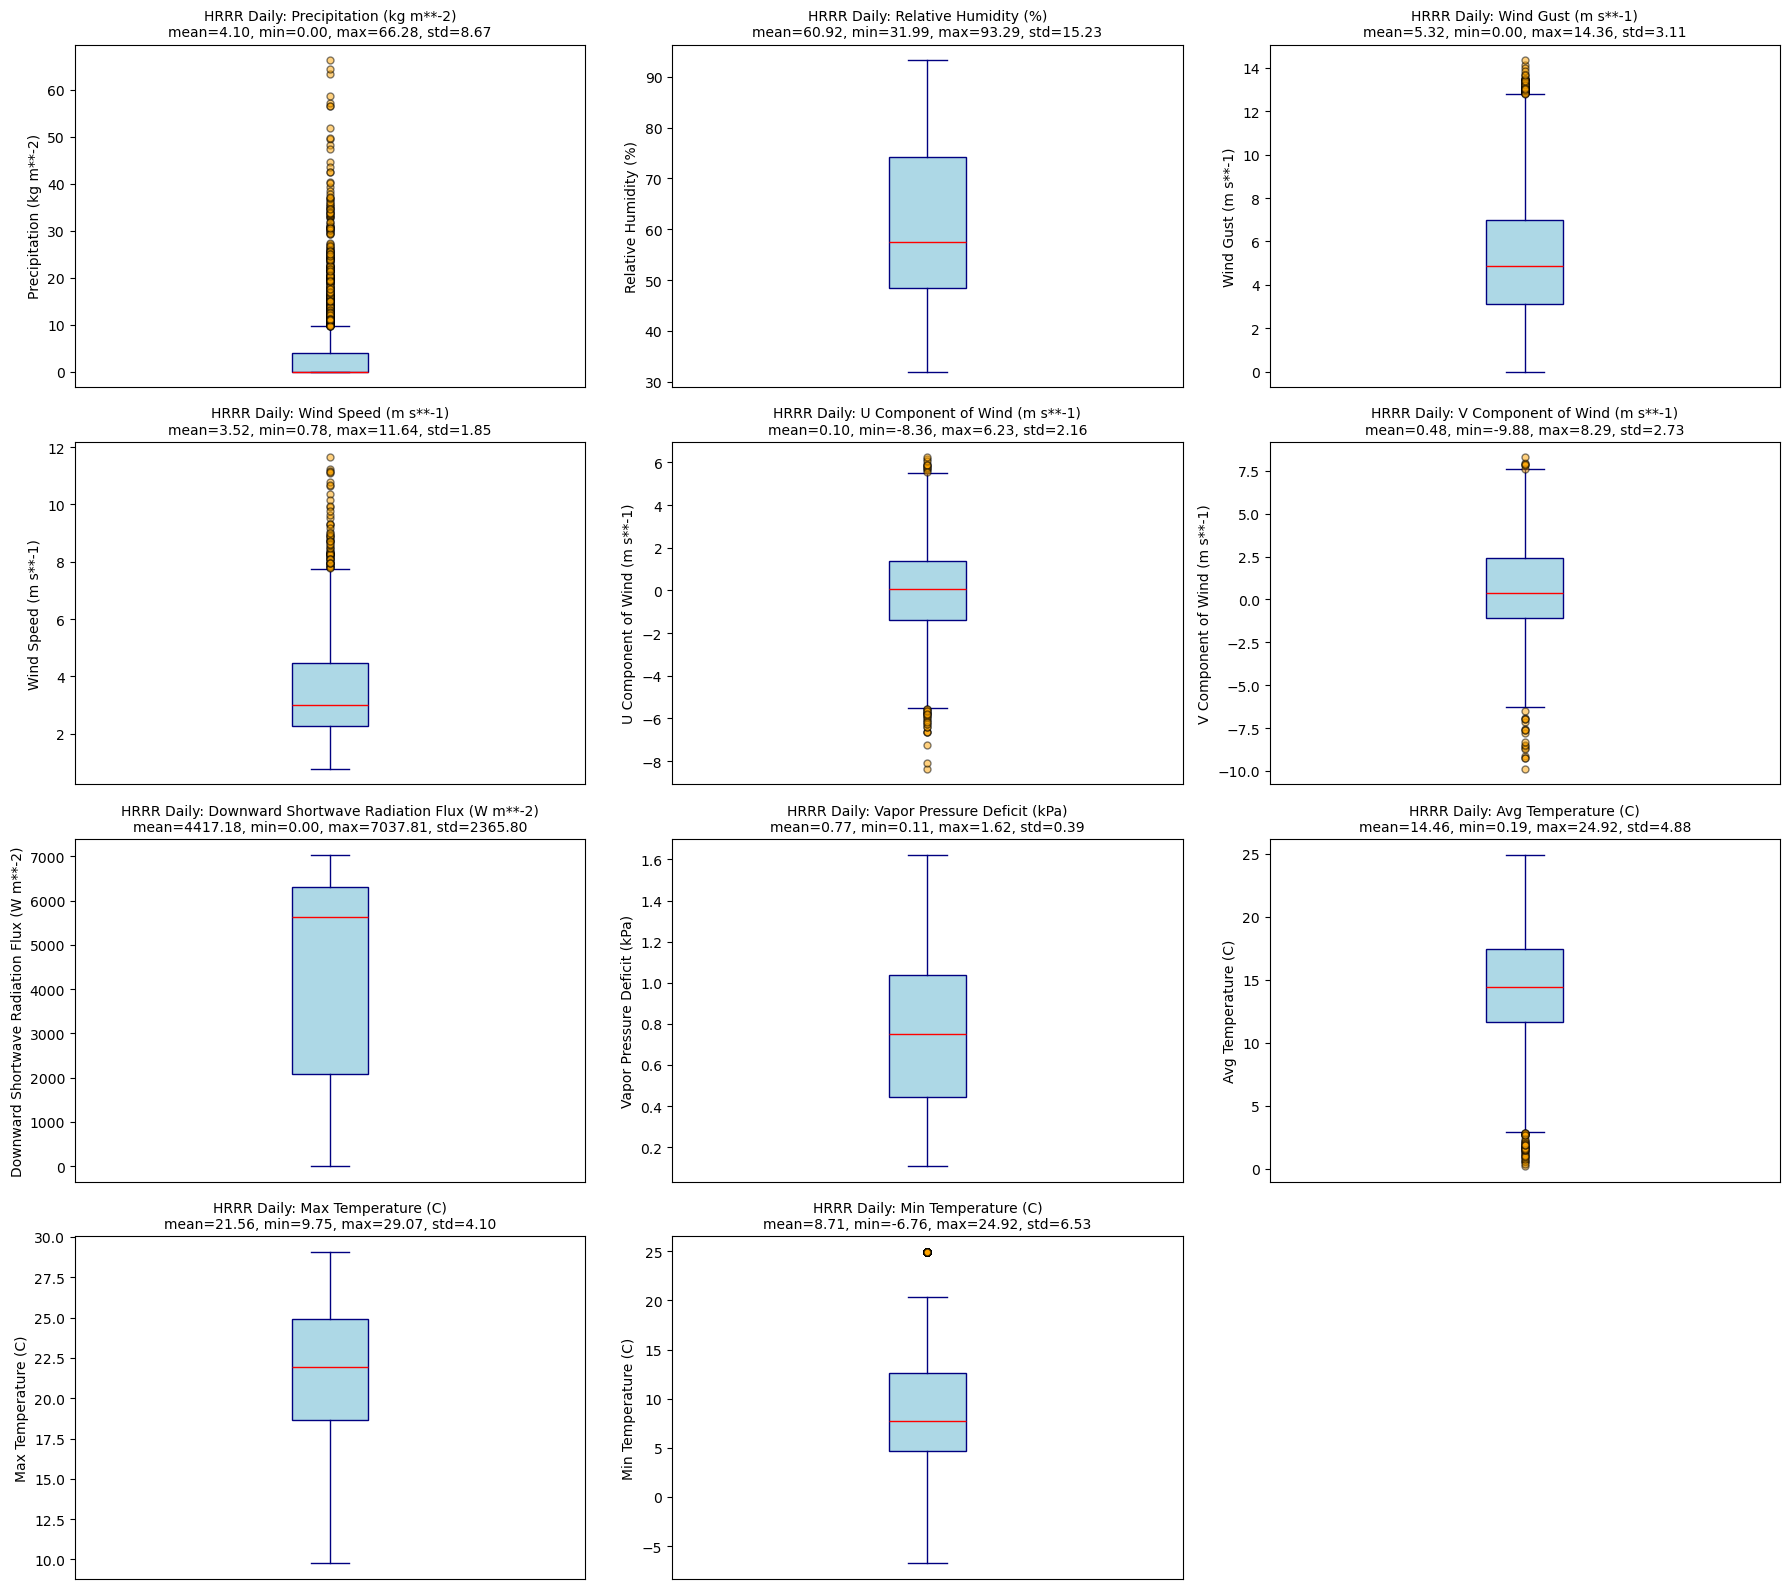

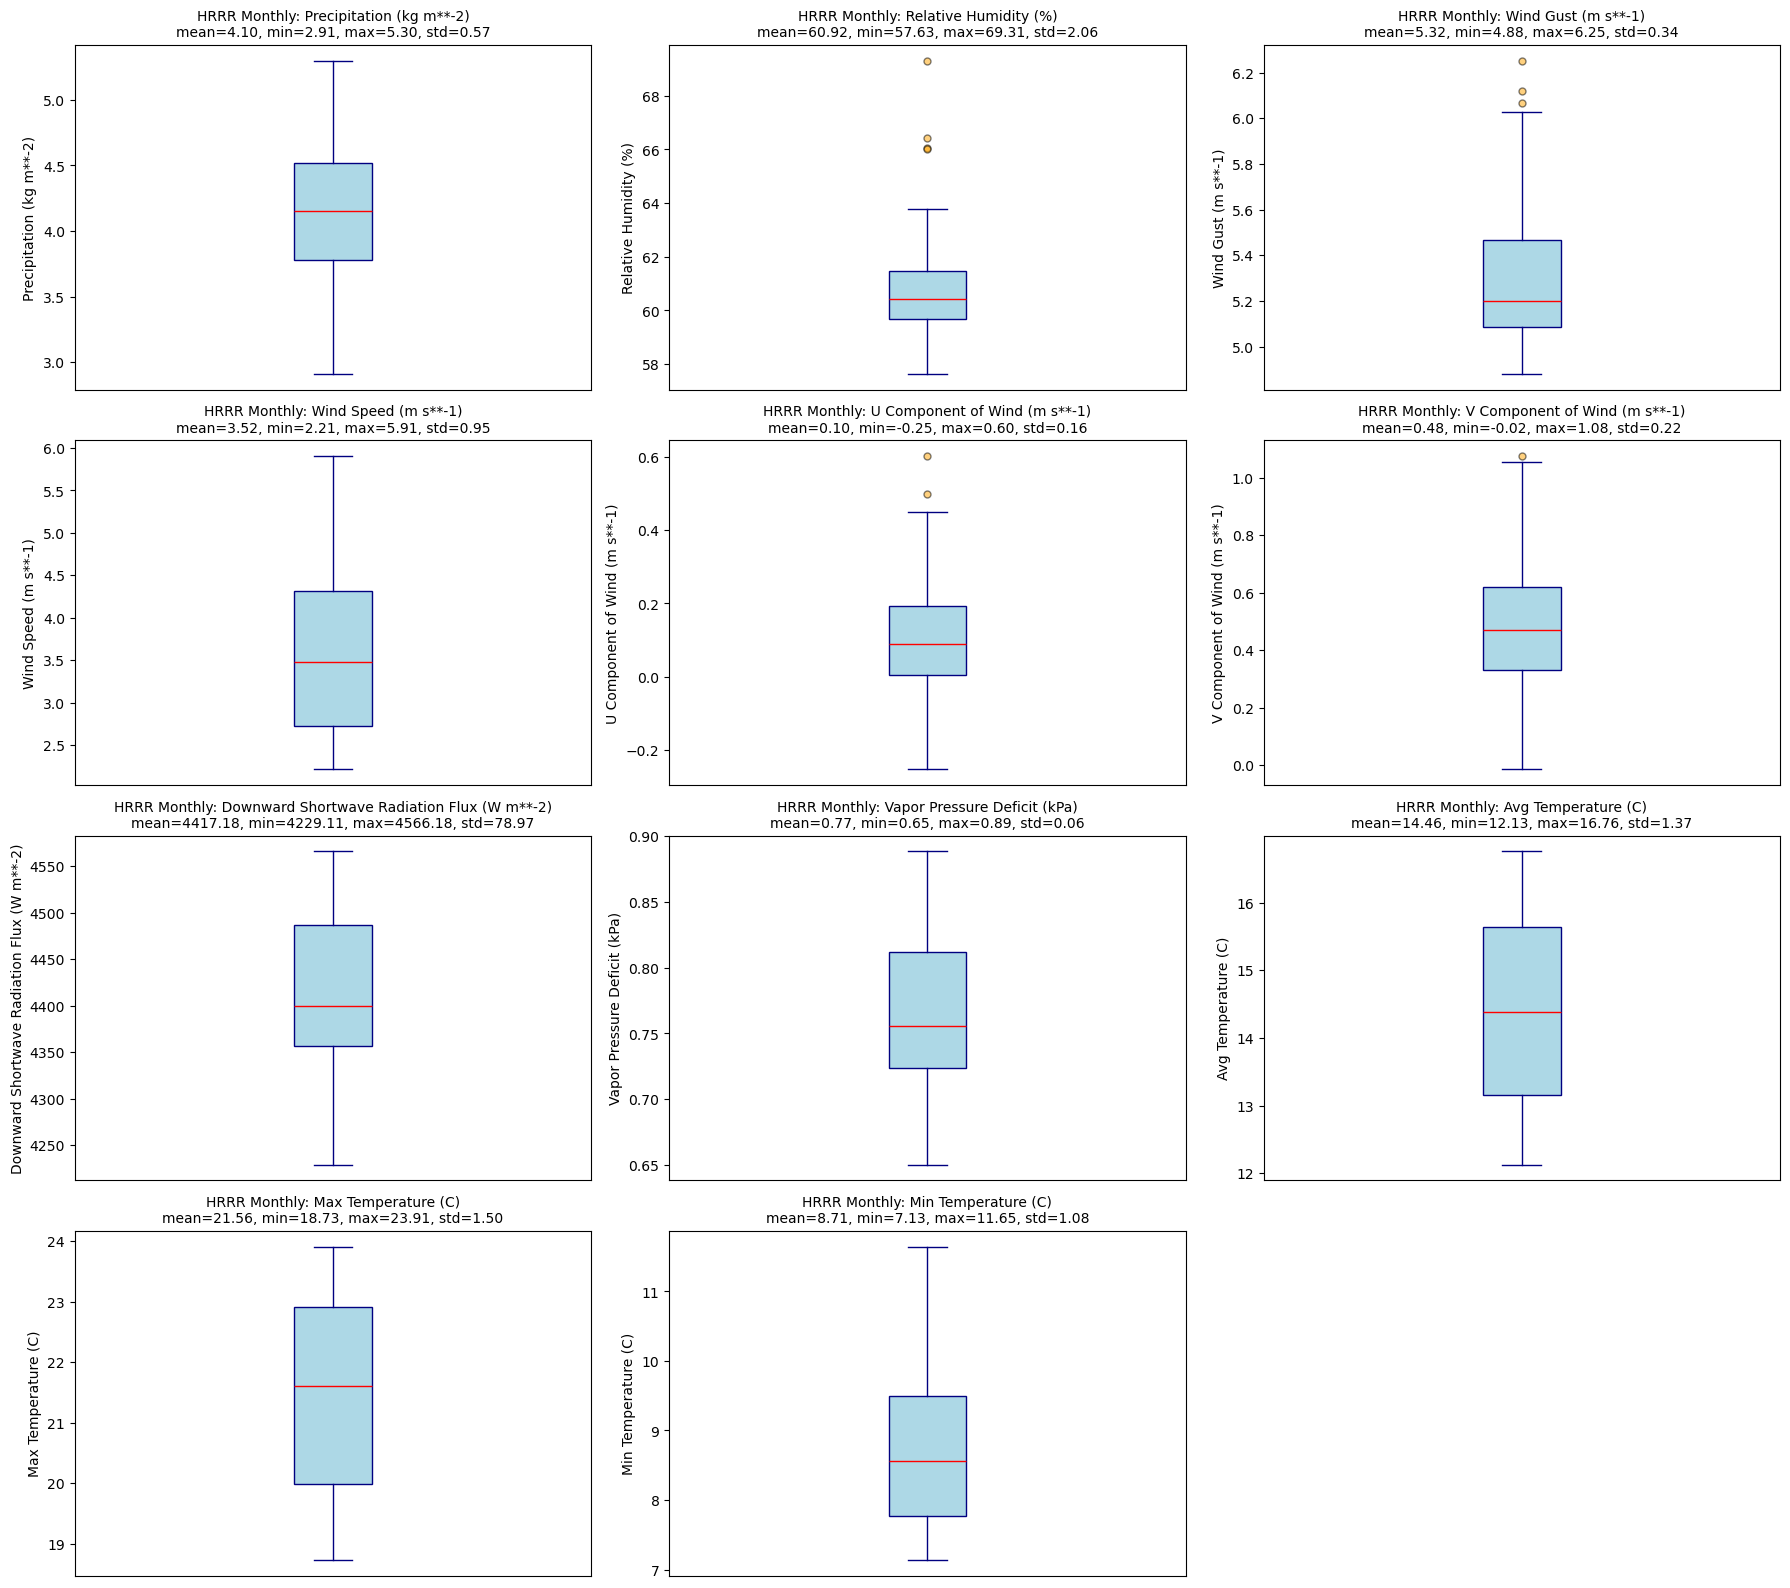

In [261]:
import matplotlib.pyplot as plt
import numpy as np

cols_to_plot = ['Precipitation (kg m**-2)', 'Relative Humidity (%)', 'Wind Gust (m s**-1)', 'Wind Speed (m s**-1)', 'U Component of Wind (m s**-1)', 'V Component of Wind (m s**-1)', 'Downward Shortwave Radiation Flux (W m**-2)', 'Vapor Pressure Deficit (kPa)', 'Avg Temperature (C)', 'Max Temperature (C)', 'Min Temperature (C)']
def plot_boxplots_stats(df, title_prefix):
    n_cols = 3
    n_rows = int(np.ceil(len(cols_to_plot) / n_cols))
    plt.figure(figsize=(n_cols * 6, n_rows * 4))
    for i, col in enumerate(cols_to_plot, 1):
        plt.subplot(n_rows, n_cols, i)
        data = df[col].dropna()
        plt.boxplot(data, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='navy'),
                    medianprops=dict(color='red'),
                    whiskerprops=dict(color='navy'),
                    capprops=dict(color='navy'),
                    flierprops=dict(markerfacecolor='orange', marker='o', markersize=5, alpha=0.5))
        stats = f"mean={data.mean():.2f}, min={data.min():.2f}, max={data.max():.2f}, std={data.std():.2f}"
        plt.title(f"{title_prefix}: {col}\n{stats}", fontsize=10)
        plt.ylabel(col)
        plt.xticks([])
    plt.tight_layout()
    plt.show()

plot_boxplots_stats(hrrr_march_df, "HRRR Daily")
plot_boxplots_stats(hrrr_march_monthly_df, "HRRR Monthly")

         Date      County  Max Temperature (C)
0  2022-03-01   COVINGTON            22.955280
1  2022-03-02   COVINGTON            25.784280
2  2022-03-03   COVINGTON            27.120640
3  2022-03-04     RUSSELL            28.976150
4  2022-03-05     LOWNDES            28.250850
5  2022-03-06     LOWNDES            29.066250
6  2022-03-07     HOUSTON            28.465083
7  2022-03-08     HOUSTON            26.675583
8  2022-03-09     HOUSTON            23.211417
9  2022-03-10      BUTLER            23.227750
10 2022-03-11     CONECUH            24.489333
11 2022-03-12     CONECUH            22.075750
12 2022-03-13   COVINGTON            15.839440
13 2022-03-14    ESCAMBIA            21.275700
14 2022-03-15      MOBILE            21.731822
15 2022-03-16     HOUSTON            22.857083
16 2022-03-17     BARBOUR            25.159767
17 2022-03-18  WASHINGTON            26.265172
18 2022-03-19  WASHINGTON            24.134483
19 2022-03-20     MARENGO            24.481207
20 2022-03-21

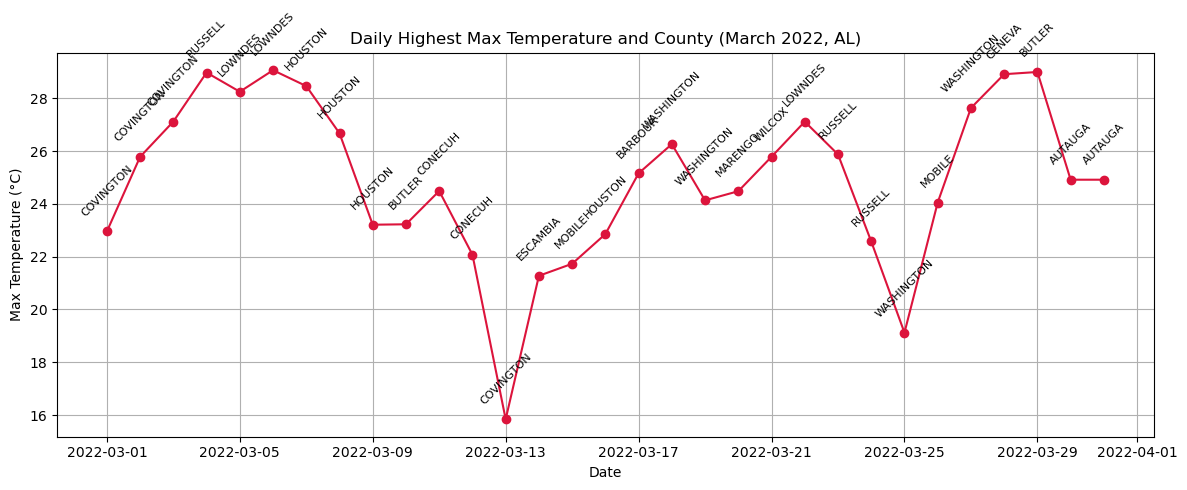

         Date      County  Precipitation (kg m**-2)
0  2022-03-01     AUTAUGA                  0.000000
1  2022-03-02     BALDWIN                  0.000033
2  2022-03-03     BALDWIN                  0.003541
3  2022-03-04     AUTAUGA                  0.000000
4  2022-03-05      MOBILE                  0.000311
5  2022-03-06      MOBILE                  0.045578
6  2022-03-07  LAUDERDALE                 18.073250
7  2022-03-08      WILCOX                 17.005548
8  2022-03-09     MADISON                 24.998200
9  2022-03-10     HOUSTON                  6.789583
10 2022-03-11      GENEVA                  8.509857
11 2022-03-12   ST. CLAIR                 23.994125
12 2022-03-13     AUTAUGA                  0.000000
13 2022-03-14        HALE                  0.000050
14 2022-03-15     HOUSTON                 22.693750
15 2022-03-16     CALHOUN                 25.760000
16 2022-03-17   JEFFERSON                  0.134286
17 2022-03-18        DALE                 66.283333
18 2022-03-1

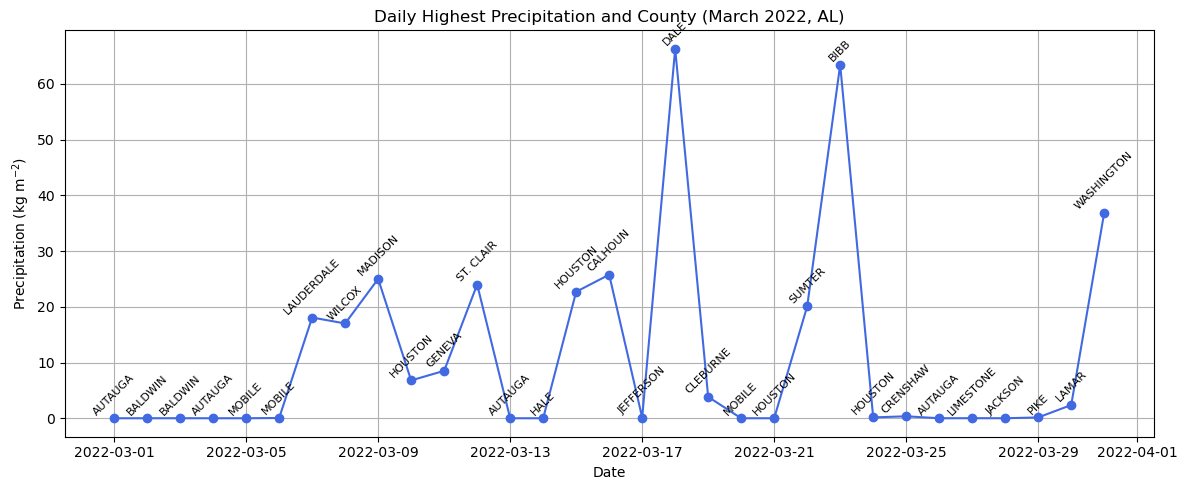

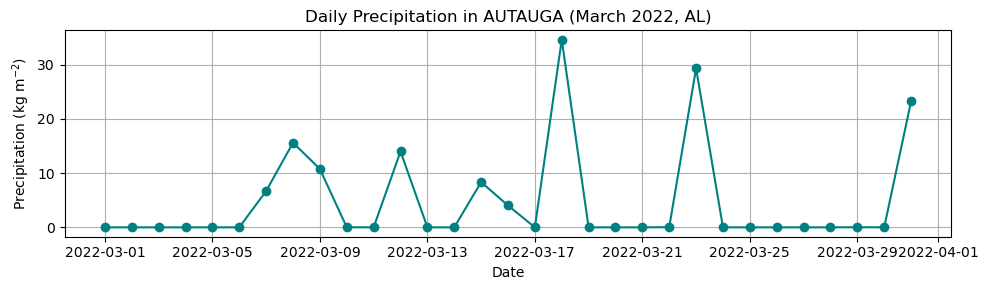

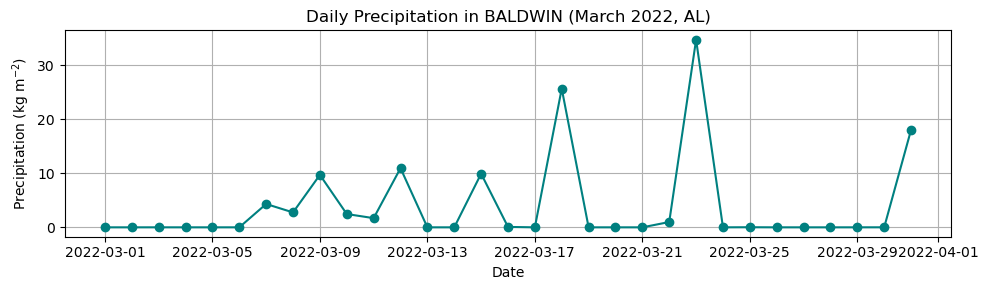

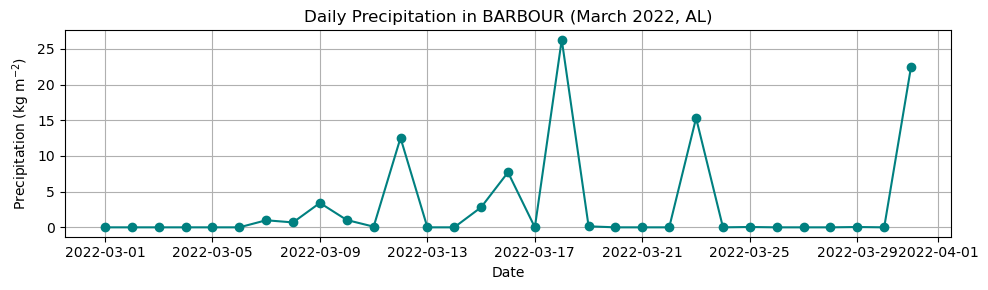

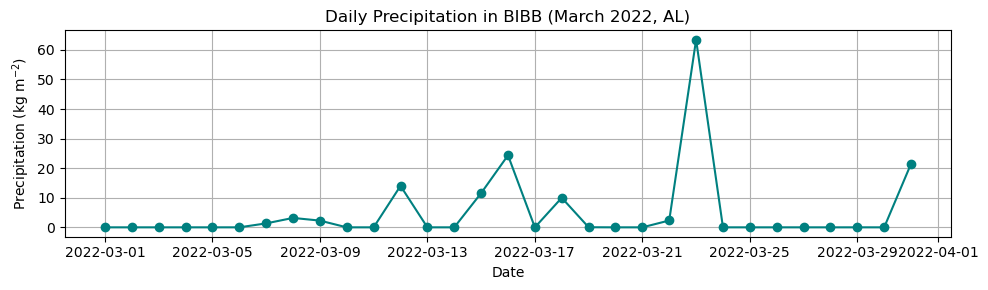

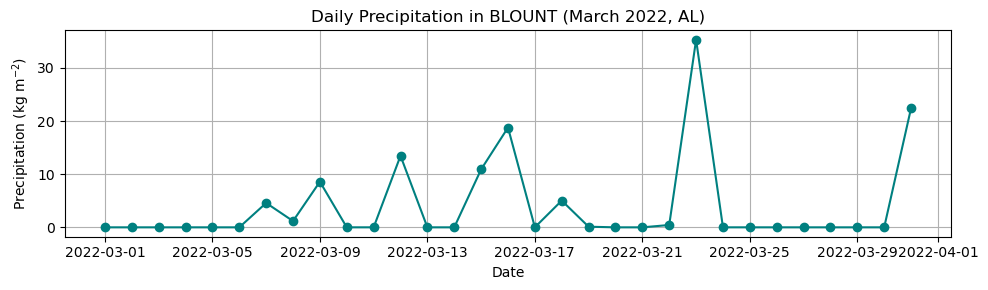

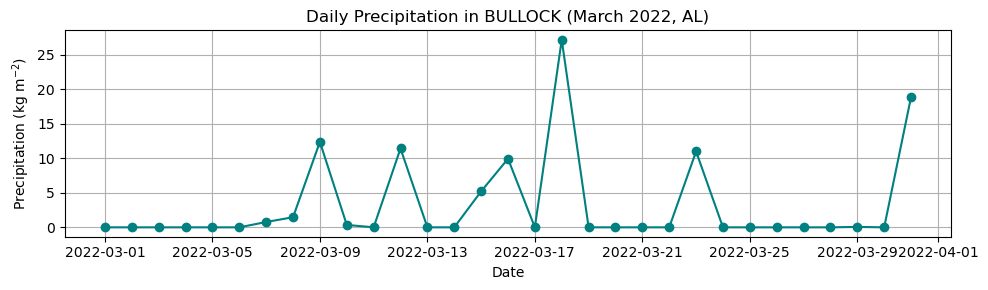

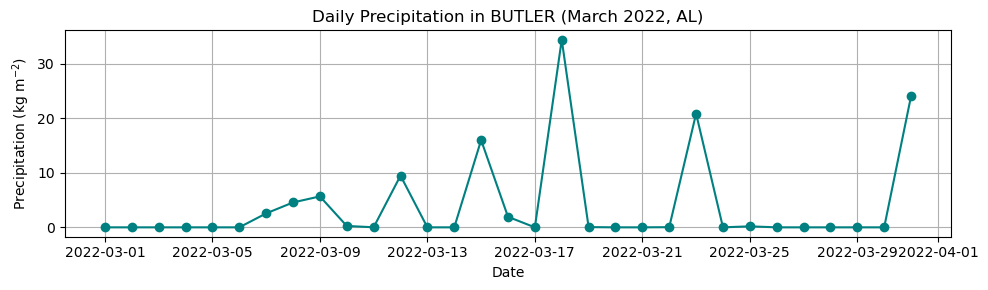

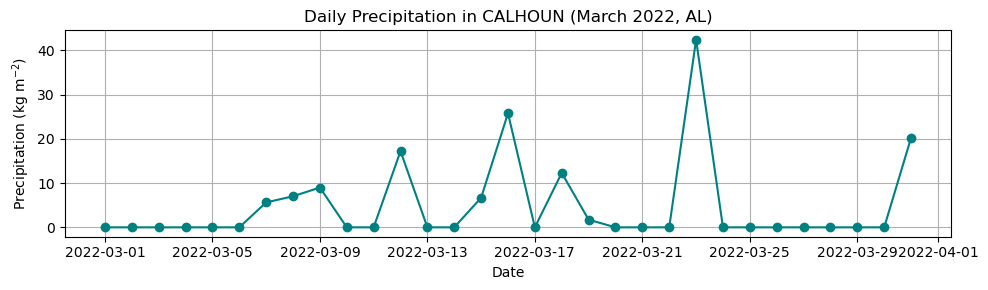

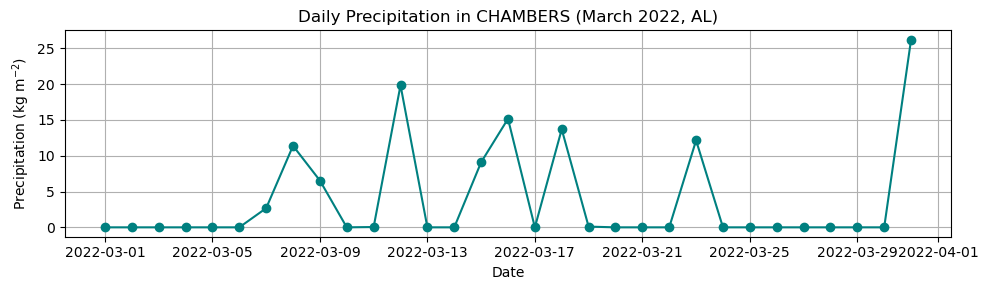

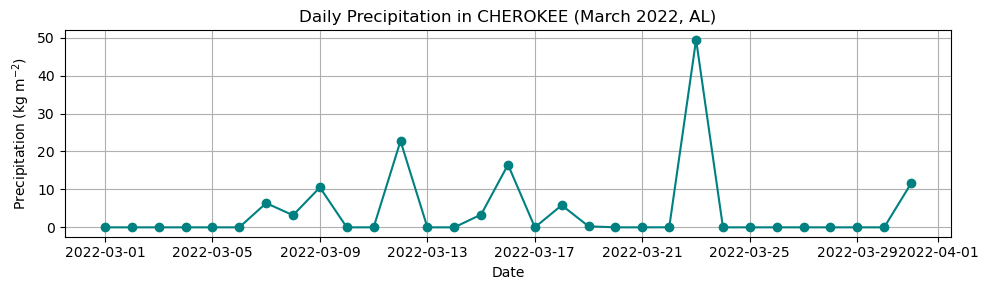

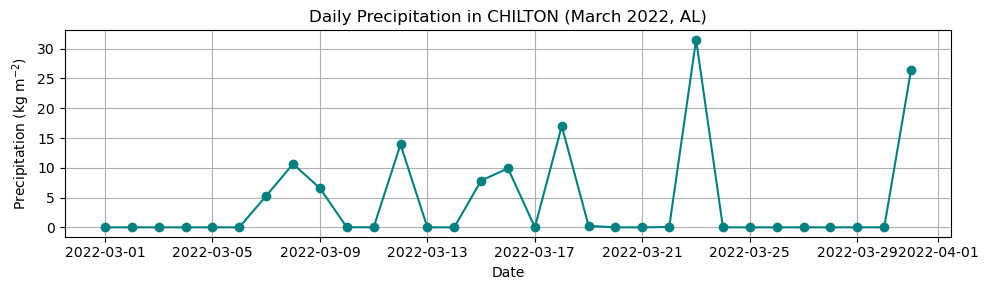

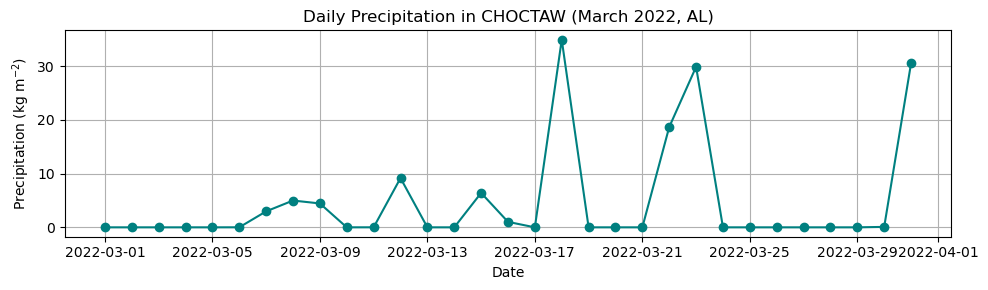

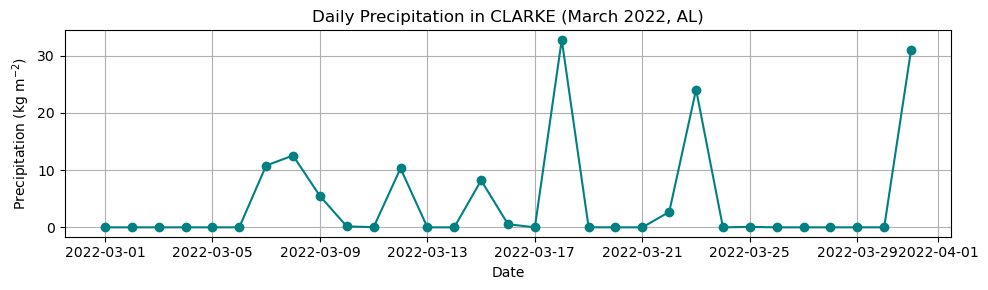

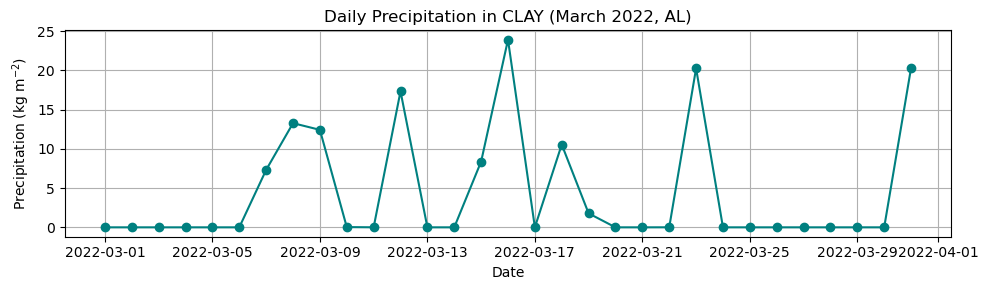

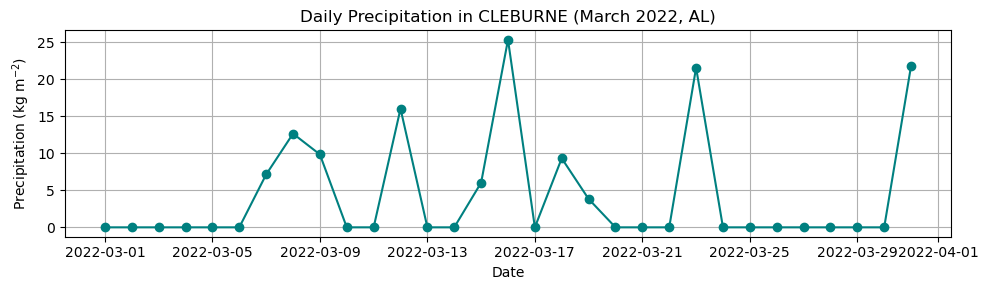

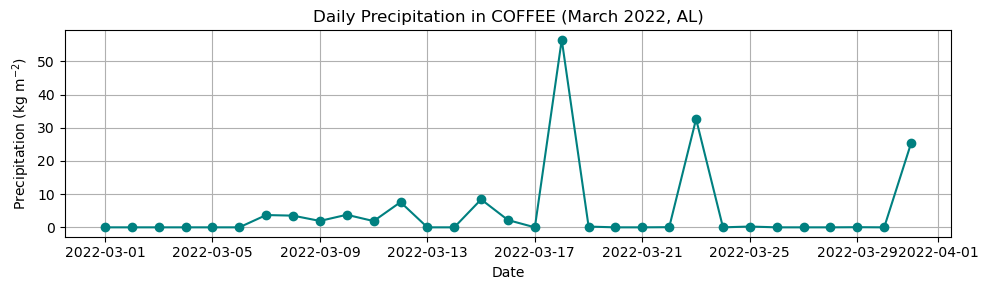

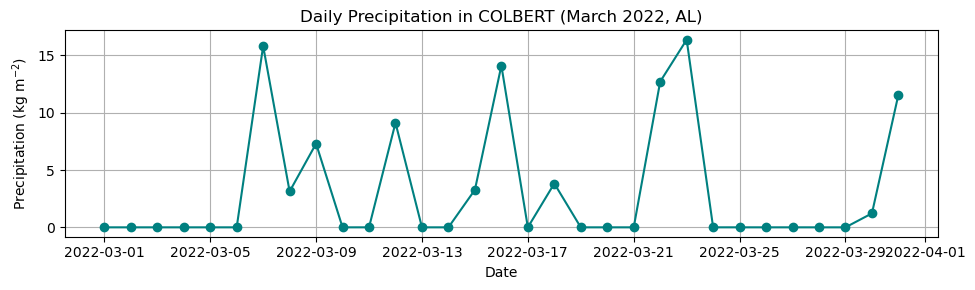

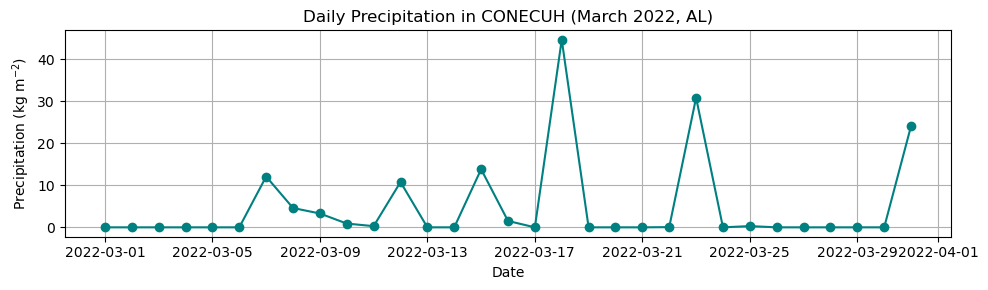

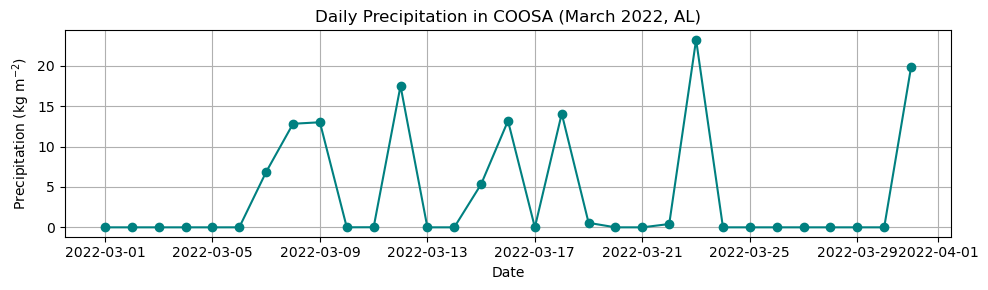

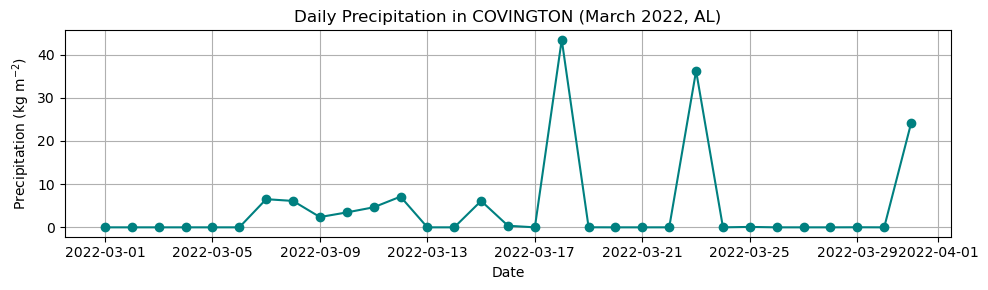

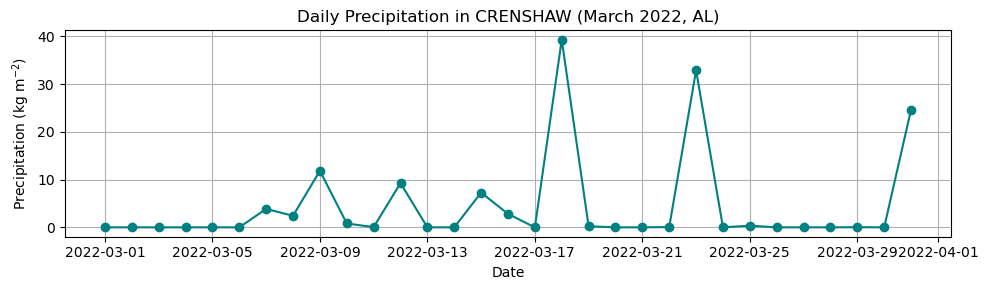

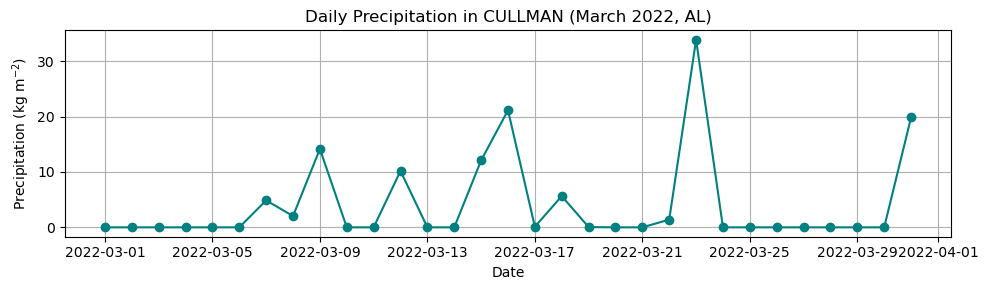

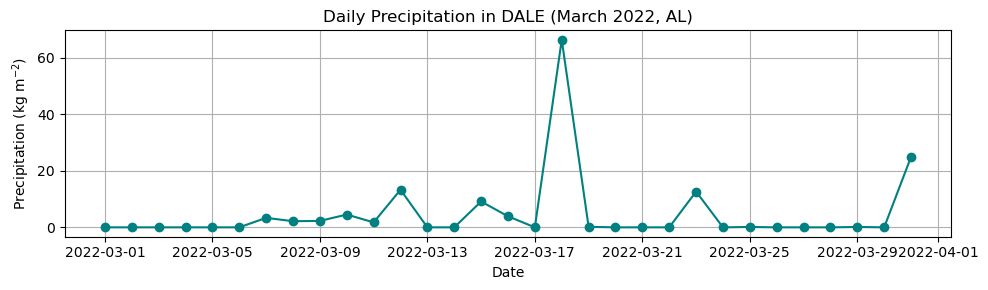

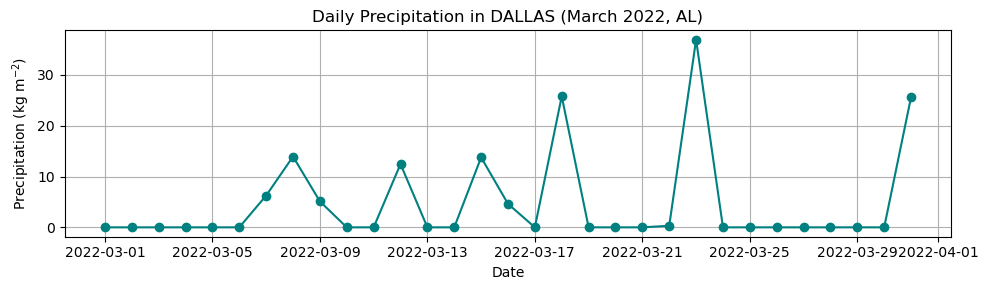

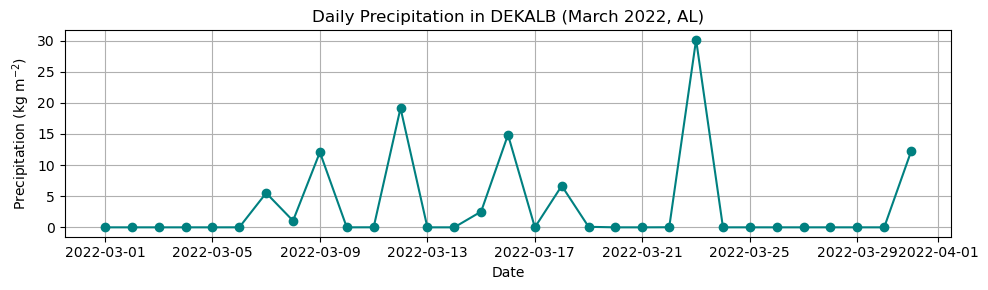

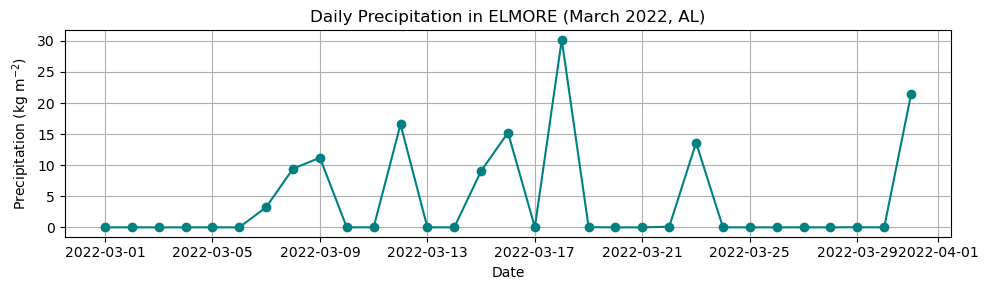

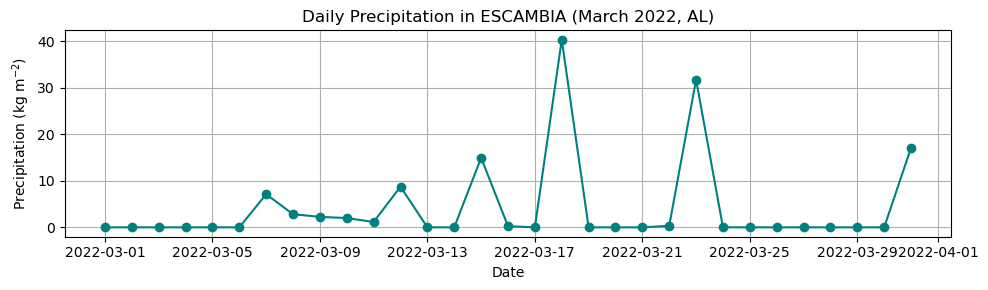

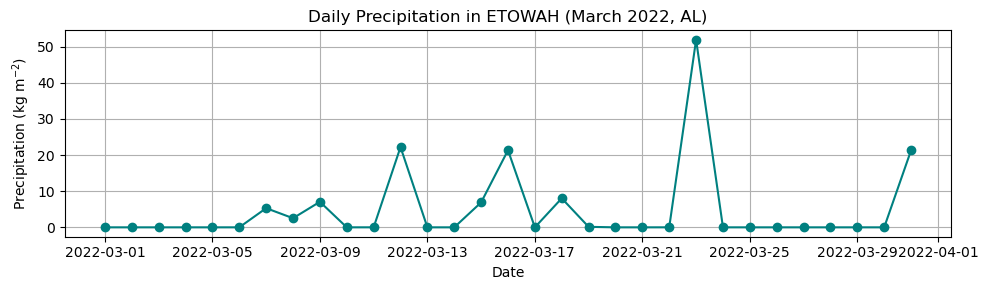

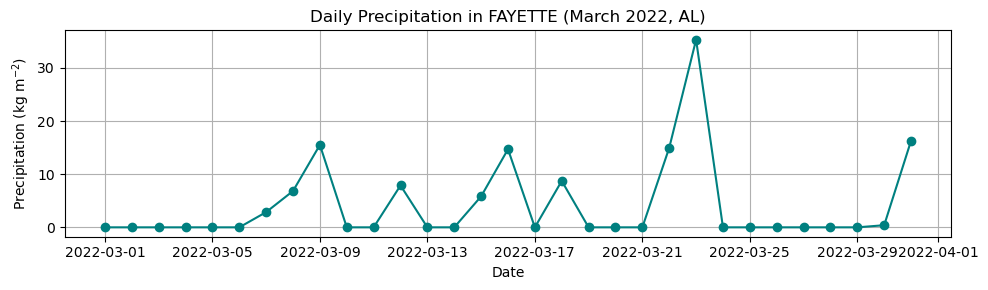

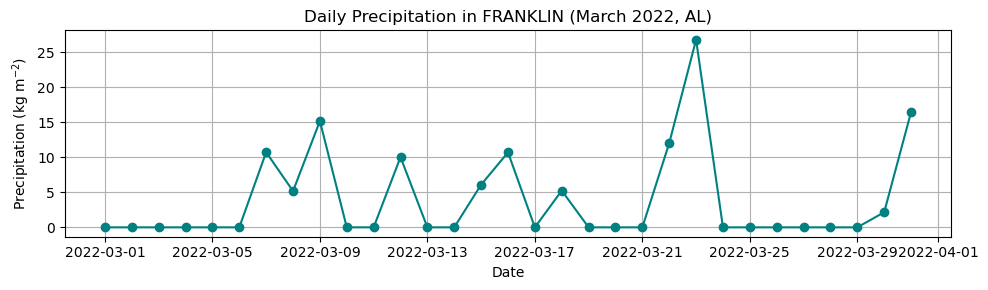

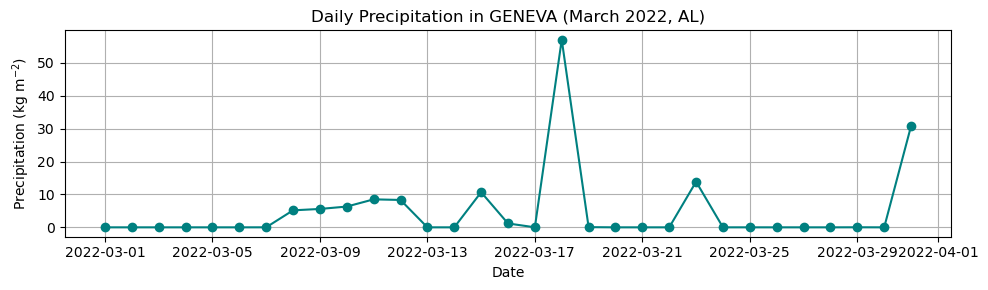

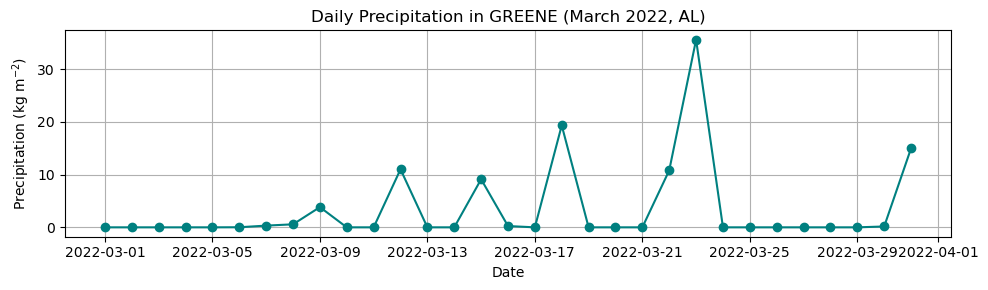

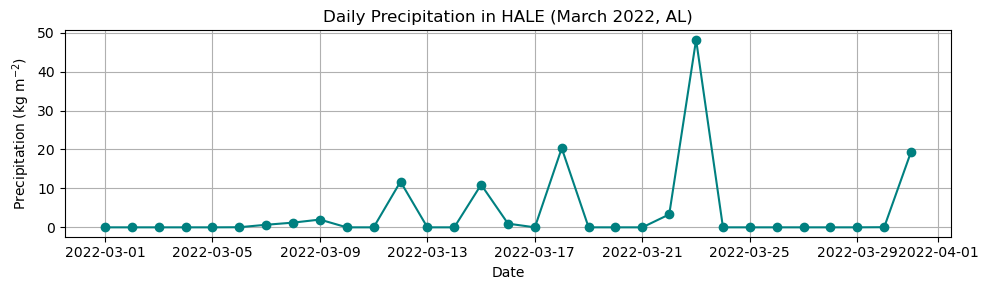

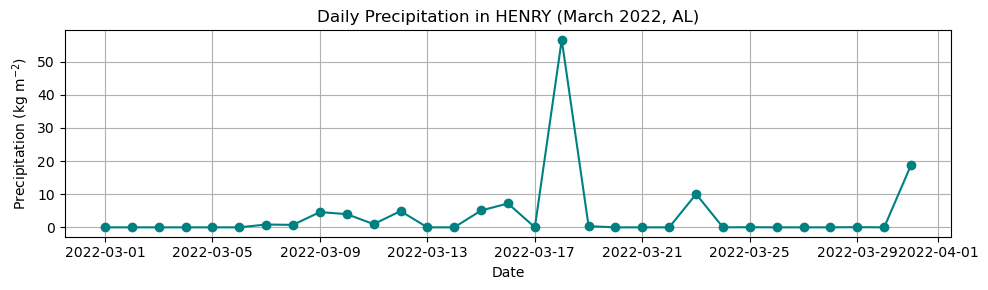

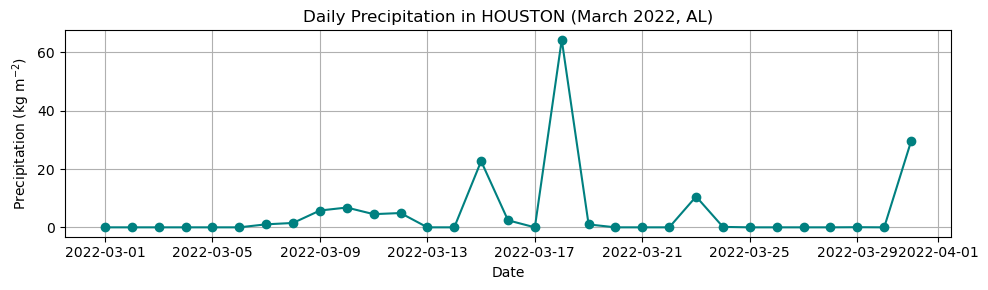

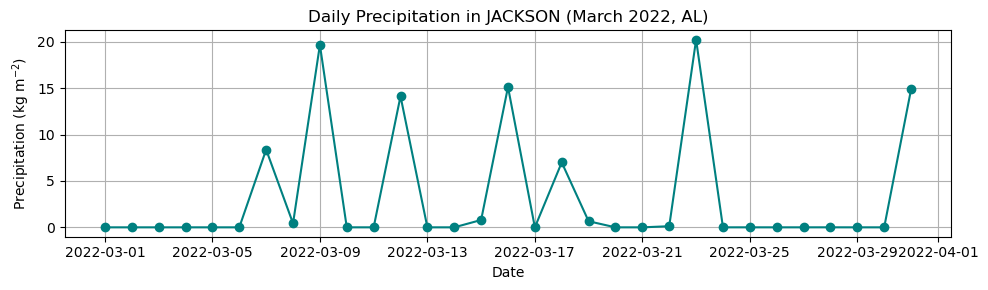

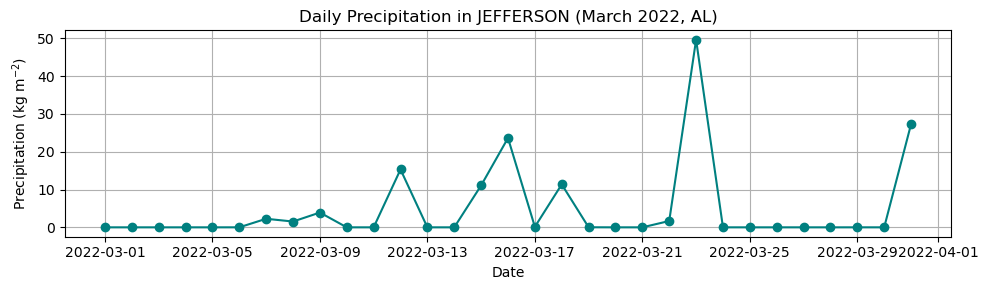

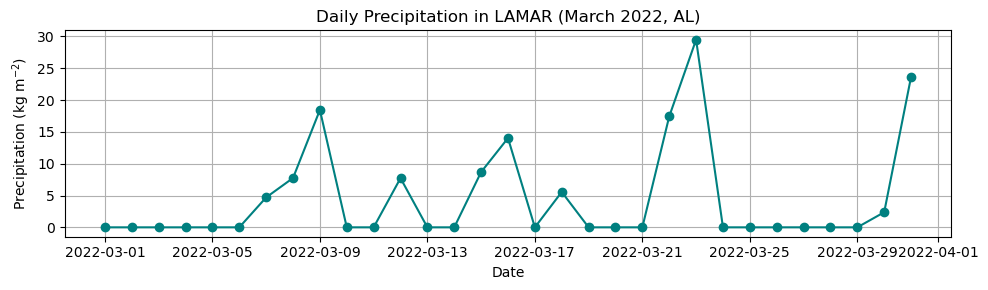

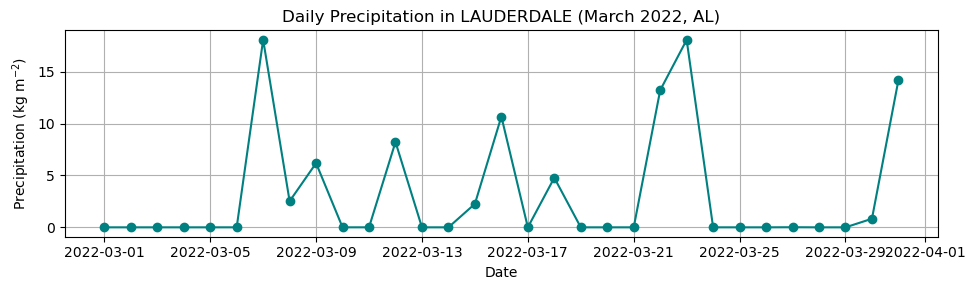

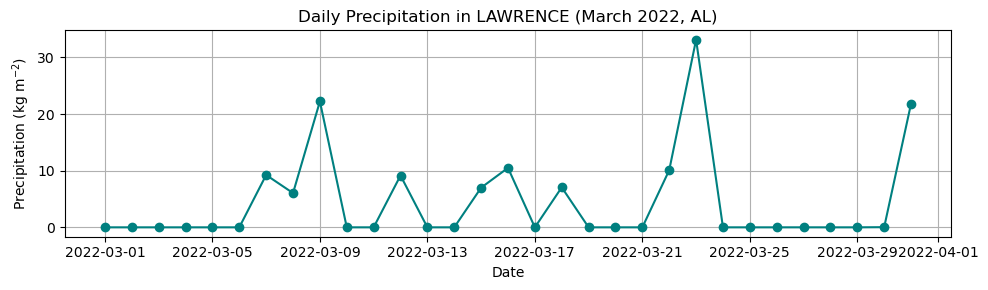

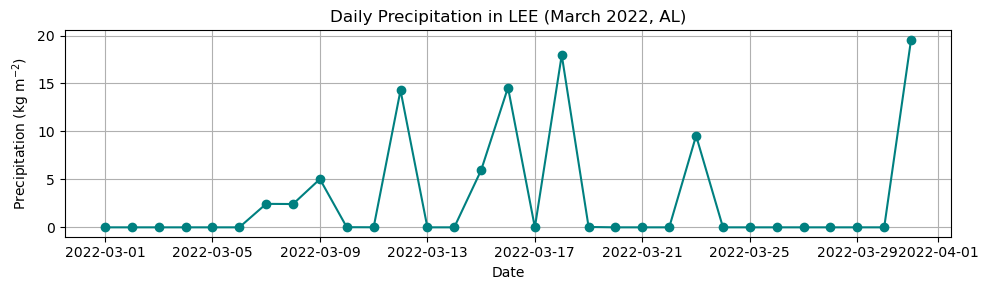

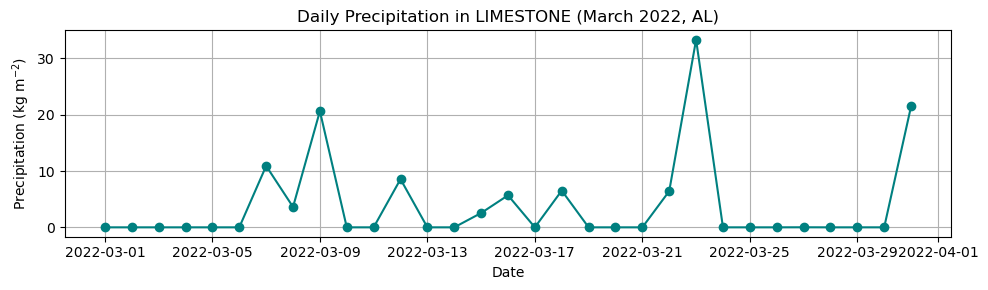

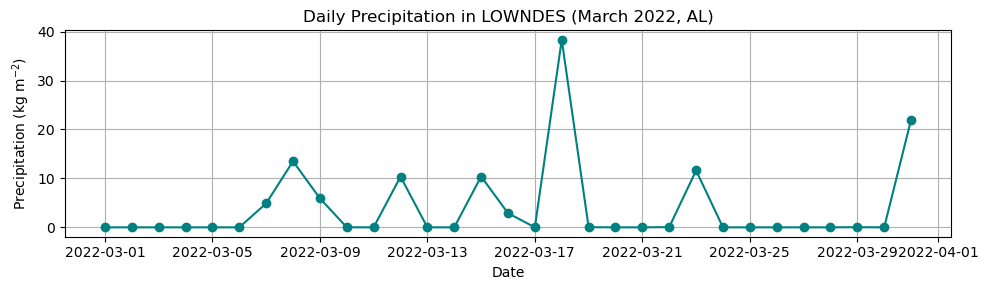

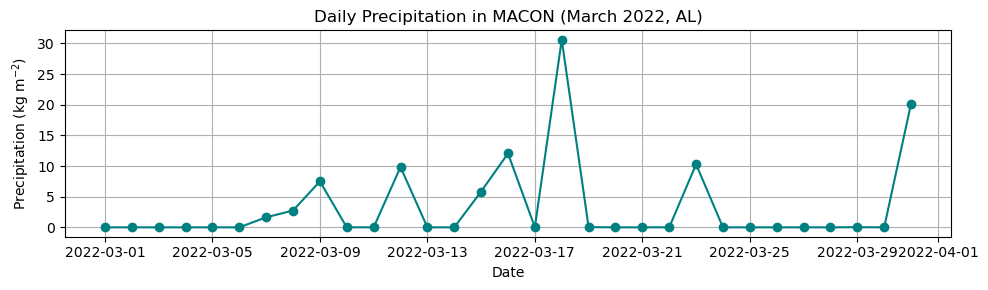

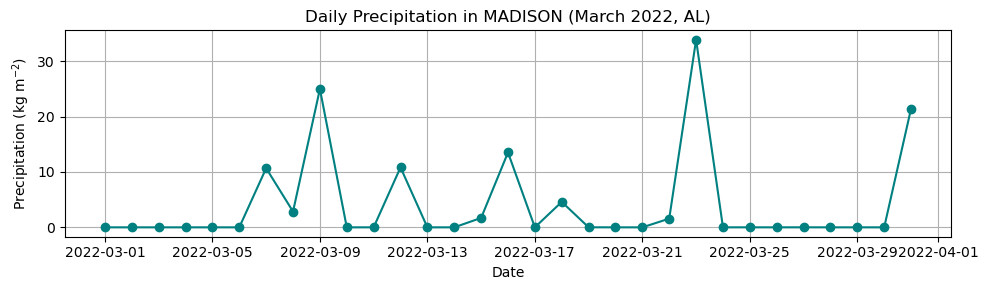

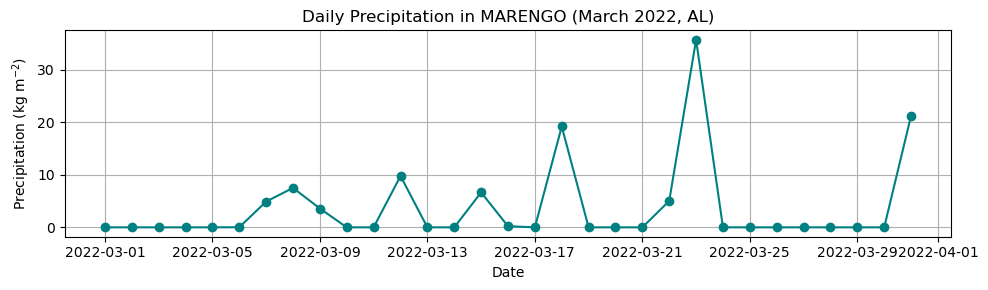

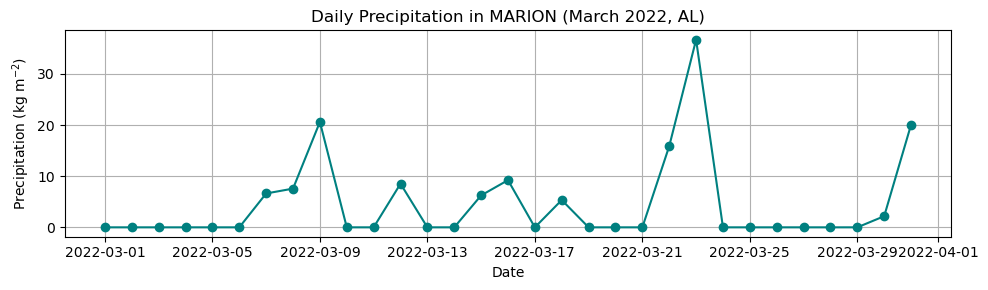

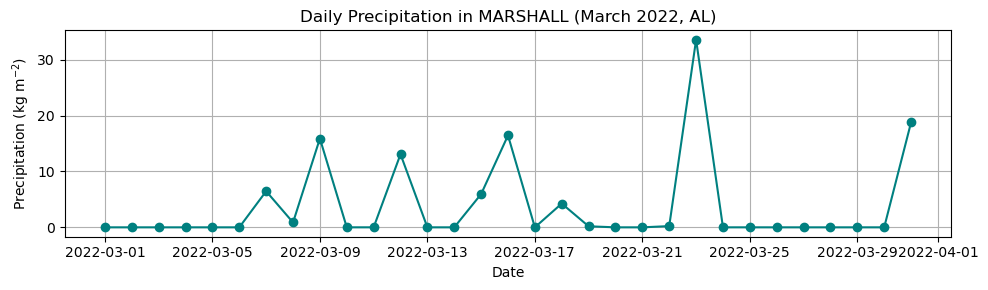

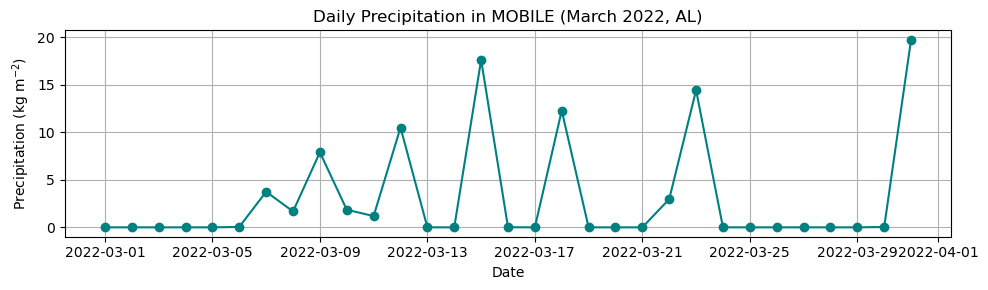

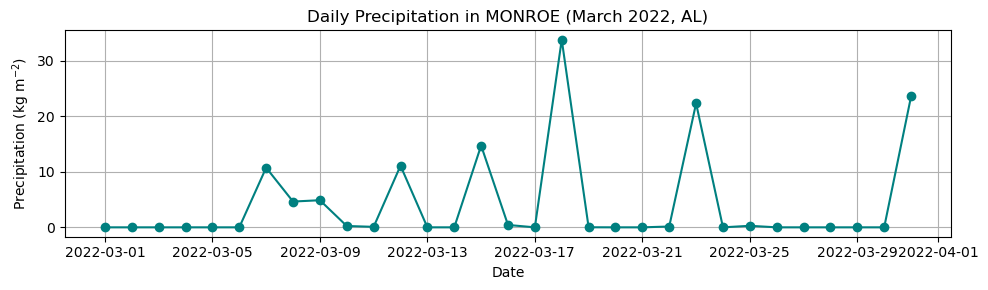

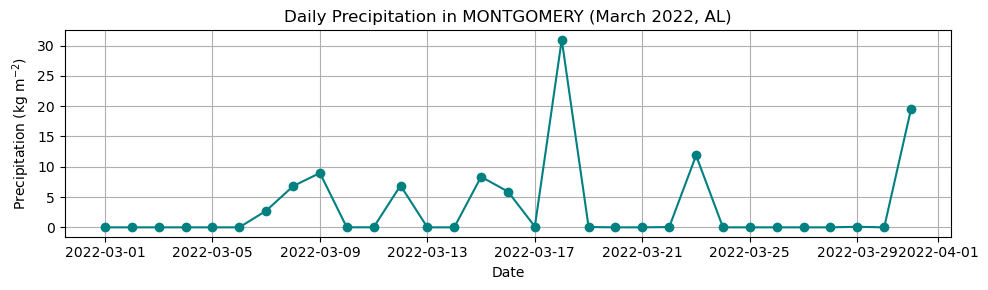

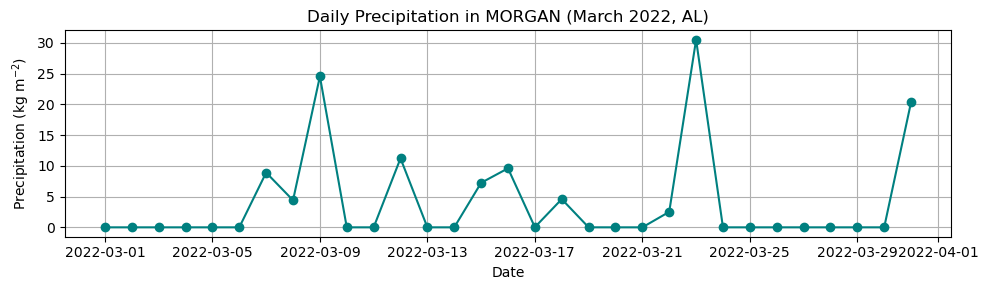

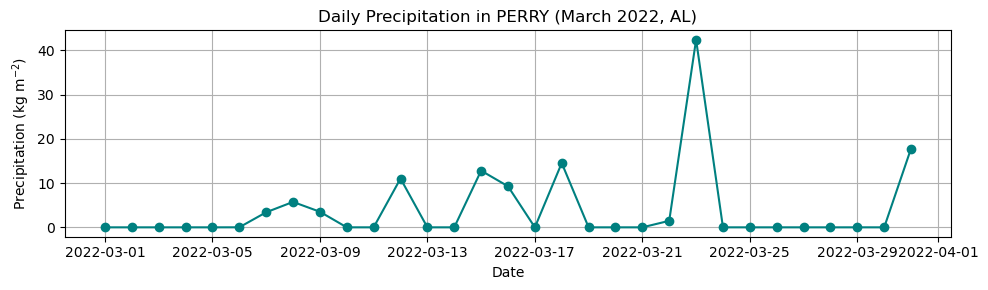

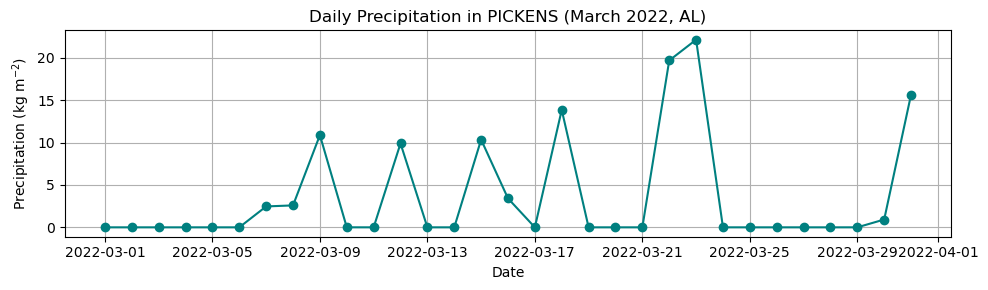

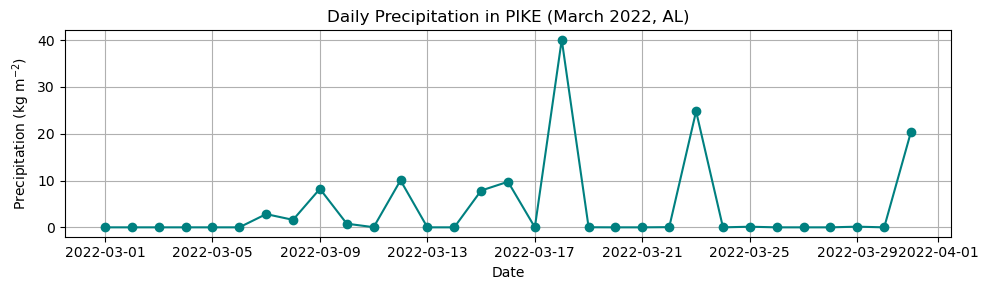

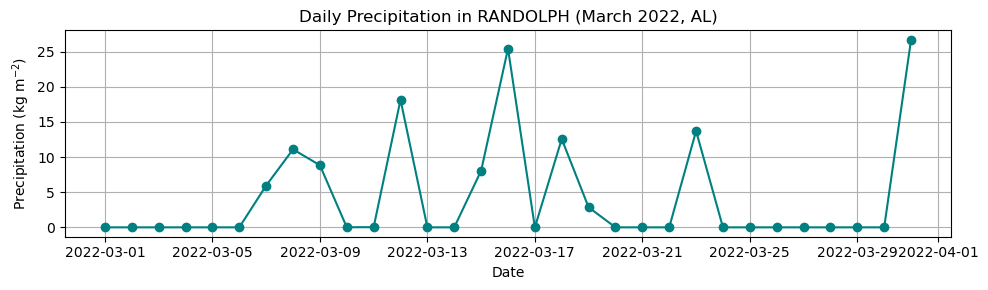

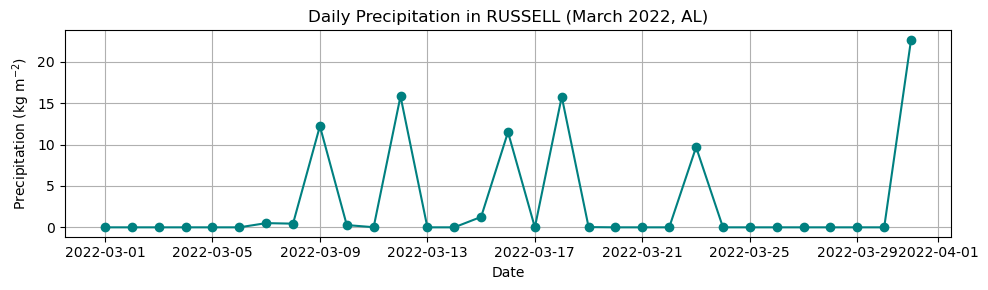

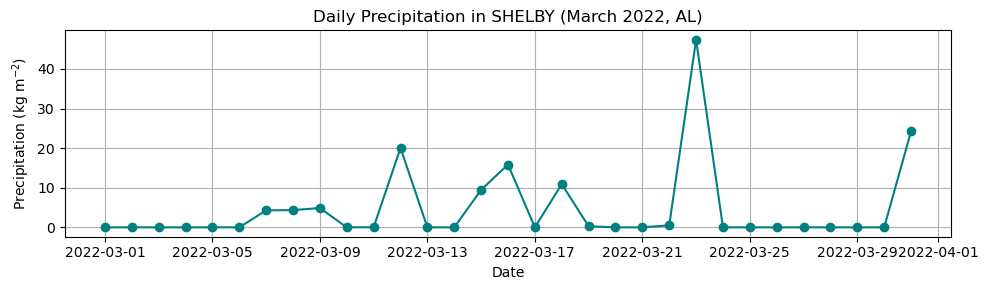

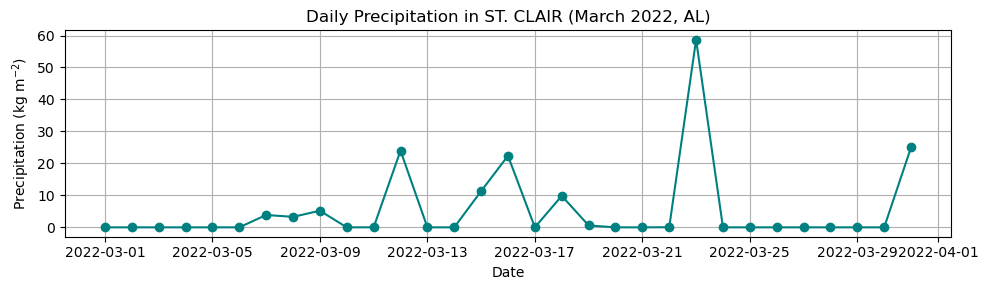

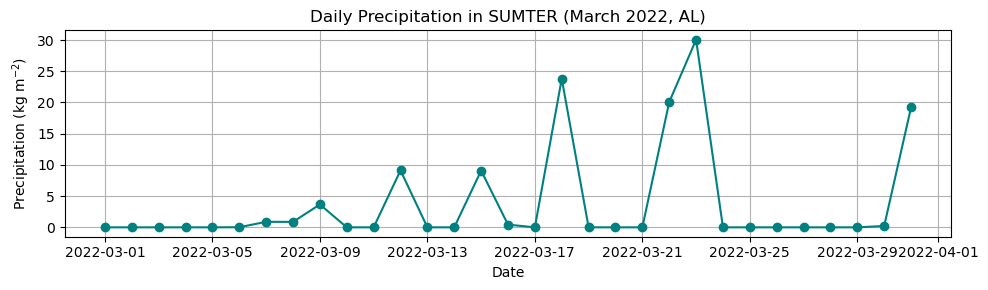

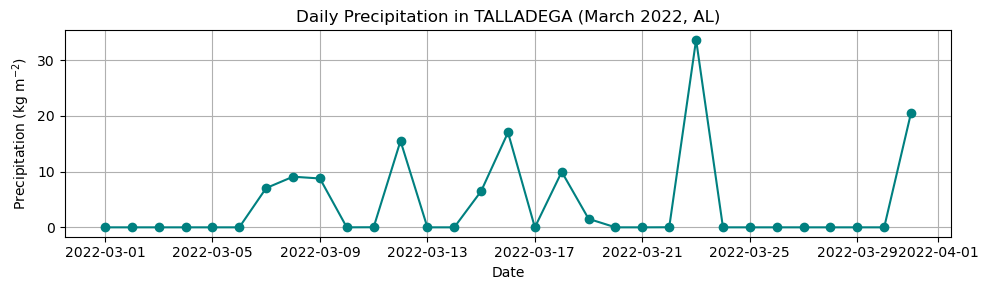

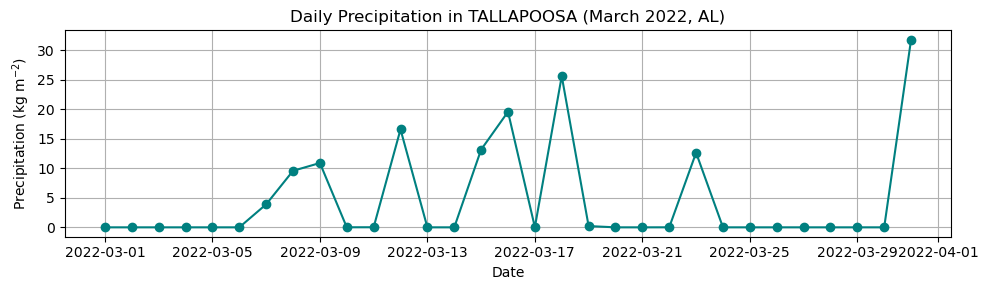

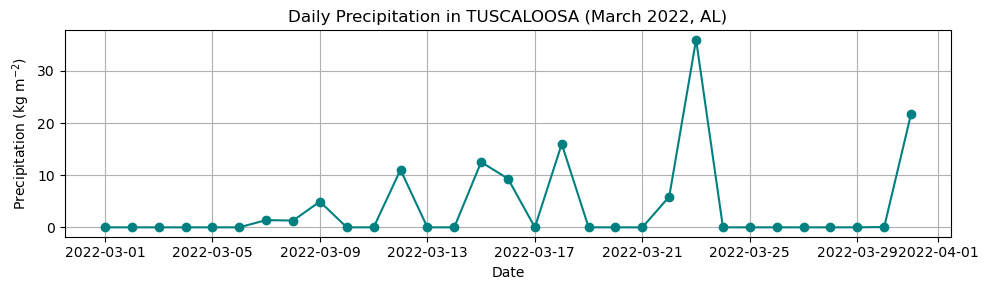

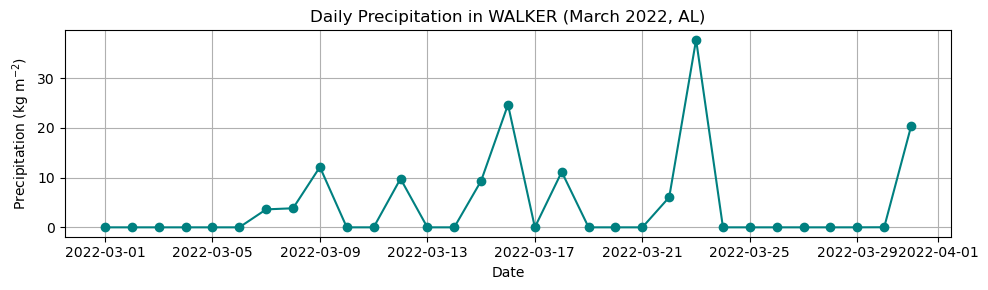

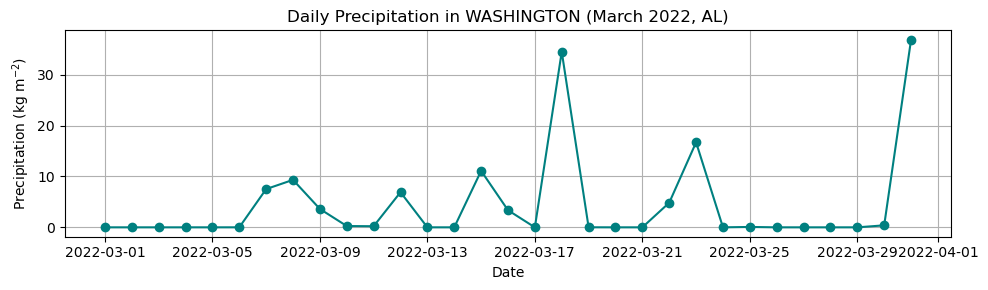

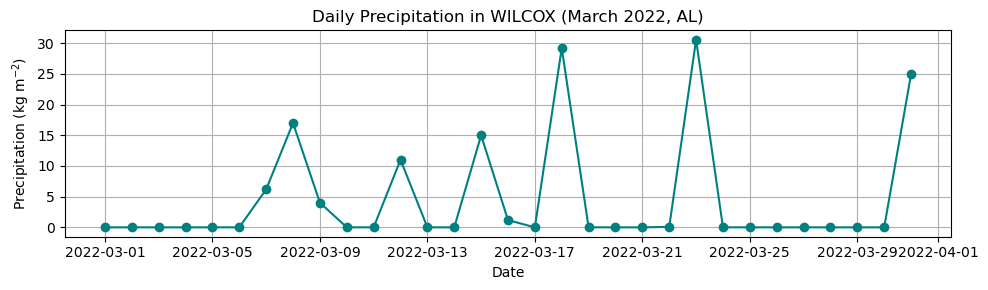

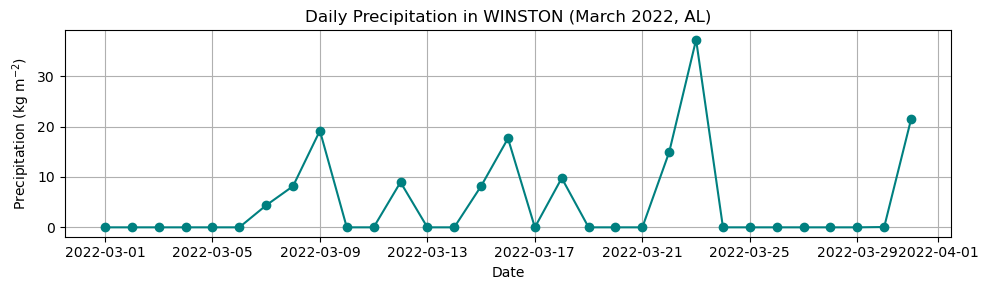

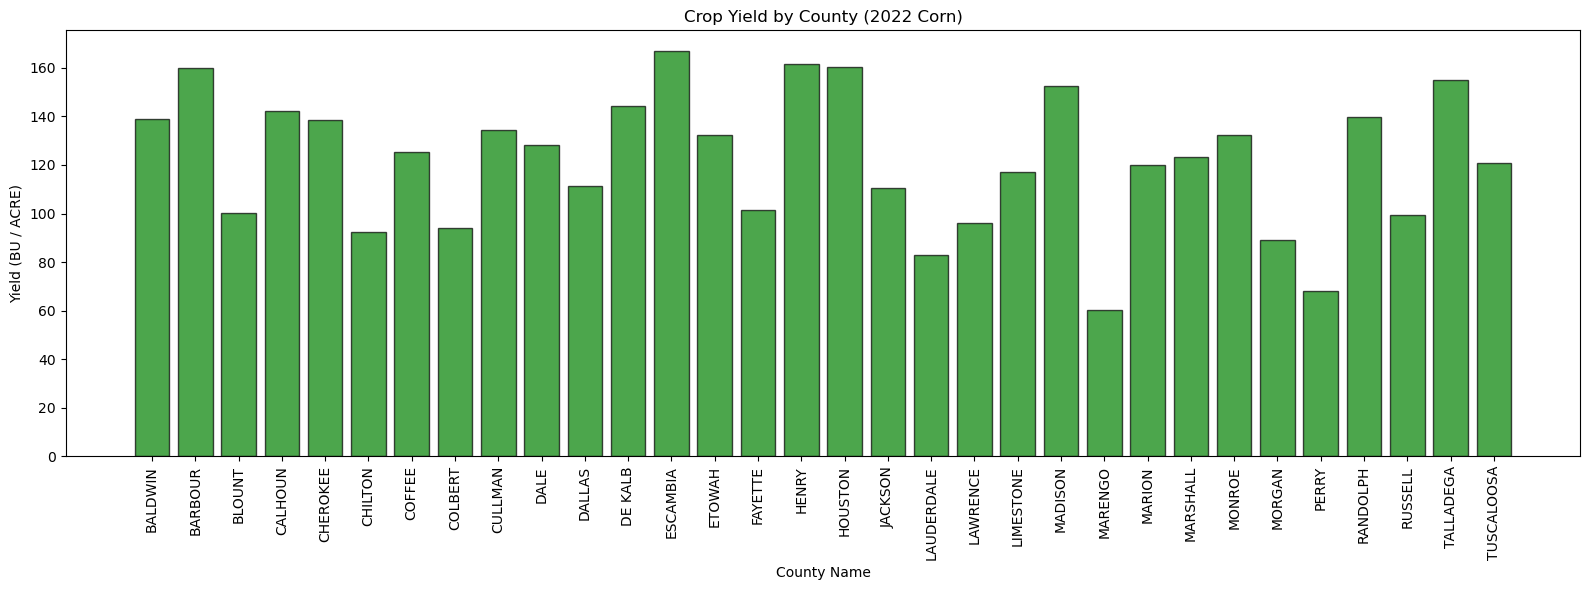

In [262]:

# For each day, find the highest max temperature and the county (and associated grid index) it came from
idx = hrrr_march_df.groupby("Date")["Max Temperature (C)"].idxmax()
daily_max_temp = hrrr_march_df.loc[idx][["Date", "County", "Max Temperature (C)"]]
daily_max_temp = daily_max_temp.sort_values("Date").reset_index(drop=True)
print(daily_max_temp)

# Line chart: highest max temperature per day and the county it came from
plt.figure(figsize=(12, 5))
plt.plot(daily_max_temp["Date"], daily_max_temp["Max Temperature (C)"], marker='o', linestyle='-', color='crimson', label='Max Temp')
for i, row in daily_max_temp.iterrows():
    plt.text(row["Date"], row["Max Temperature (C)"] + 0.5, row["County"], fontsize=8, rotation=45, ha='center', va='bottom')
plt.title("Daily Highest Max Temperature and County (March 2022, AL)")
plt.xlabel("Date")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# For each day, find the highest precipitation and the county (and associated grid index) it came from
idx = hrrr_march_df.groupby("Date")["Precipitation (kg m**-2)"].idxmax()
daily_max_precip = hrrr_march_df.loc[idx][["Date", "County", "Precipitation (kg m**-2)"]]
daily_max_precip = daily_max_precip.sort_values("Date").reset_index(drop=True)
print(daily_max_precip)

# Line chart: highest precipitation per day and the county it came from
plt.figure(figsize=(12, 5))
plt.plot(daily_max_precip["Date"], daily_max_precip["Precipitation (kg m**-2)"], marker='o', linestyle='-', color='royalblue', label='Max Precipitation')
for i, row in daily_max_precip.iterrows():
    plt.text(row["Date"], row["Precipitation (kg m**-2)"] + 0.2, row["County"], fontsize=8, rotation=45, ha='center', va='bottom')
plt.title("Daily Highest Precipitation and County (March 2022, AL)")
plt.xlabel("Date")
plt.ylabel("Precipitation (kg m$^{-2}$)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 67 graphs: daily precipitation for each county
unique_counties = hrrr_march_df["County"].unique()
for county in unique_counties:
    county_df = hrrr_march_df[hrrr_march_df["County"] == county]
    plt.figure(figsize=(10, 3))
    plt.plot(county_df["Date"], county_df["Precipitation (kg m**-2)"], marker='o', linestyle='-', color='teal')
    plt.title(f"Daily Precipitation in {county} (March 2022, AL)")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (kg m$^{-2}$)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Distribution of crop yield across counties (bar chart)
plt.figure(figsize=(16, 6))
plt.bar(usda_corn_df["county_name"], usda_corn_df["YIELD, MEASURED IN BU / ACRE"], color='green', edgecolor='black', alpha=0.7)
plt.title("Crop Yield by County (2022 Corn)")
plt.xlabel("County Name")
plt.ylabel("Yield (BU / ACRE)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

        State      County       Date  Precipitation (kg m**-2)  \
31    ALABAMA     BALDWIN 2022-03-01                  0.000000   
32    ALABAMA     BALDWIN 2022-03-02                  0.000033   
33    ALABAMA     BALDWIN 2022-03-03                  0.003541   
34    ALABAMA     BALDWIN 2022-03-04                  0.000000   
35    ALABAMA     BALDWIN 2022-03-05                  0.000213   
...       ...         ...        ...                       ...   
1948  ALABAMA  TUSCALOOSA 2022-03-27                  0.000000   
1949  ALABAMA  TUSCALOOSA 2022-03-28                  0.000000   
1950  ALABAMA  TUSCALOOSA 2022-03-29                  0.001833   
1951  ALABAMA  TUSCALOOSA 2022-03-30                  0.057833   
1952  ALABAMA  TUSCALOOSA 2022-03-31                 21.756690   

      Relative Humidity (%)  Wind Gust (m s**-1)  Wind Speed (m s**-1)  \
31                48.088525             4.672295              5.977131   
32                56.001639             2.928082           

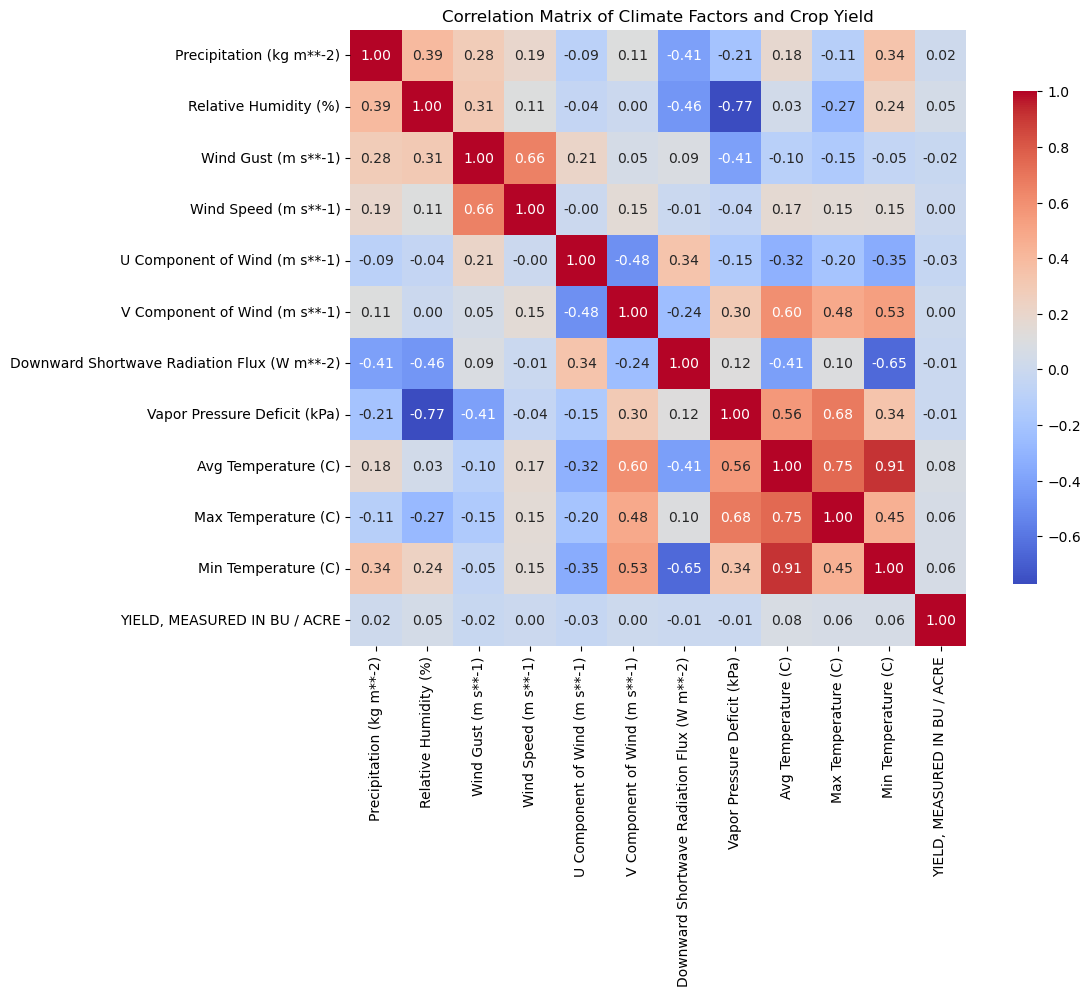

YIELD, MEASURED IN BU / ACRE                   1.000000
Avg Temperature (C)                            0.075230
Max Temperature (C)                            0.063949
Min Temperature (C)                            0.060098
Relative Humidity (%)                          0.050797
Precipitation (kg m**-2)                       0.015377
V Component of Wind (m s**-1)                  0.003790
Wind Speed (m s**-1)                           0.002415
Downward Shortwave Radiation Flux (W m**-2)   -0.005170
Vapor Pressure Deficit (kPa)                  -0.005256
Wind Gust (m s**-1)                           -0.023883
U Component of Wind (m s**-1)                 -0.032468
Name: YIELD, MEASURED IN BU / ACRE, dtype: float64


In [263]:
import seaborn as sns
hrrr_march_df.head()
# Merge HRRR daily data with USDA corn data by FIPS, keeping all HRRR daily rows (left join)
merged_df = hrrr_march_df.merge(
    usda_corn_df[["FIPS", "YIELD, MEASURED IN BU / ACRE"]],
    on="FIPS",
    how="left"
)
merged_df_clean = merged_df.dropna()
print(merged_df_clean)
# Only include numeric columns in the correlation matrix
numeric_df = merged_df_clean.select_dtypes(include=["number"])

# Now compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Climate Factors and Crop Yield")
plt.show()
yield_corr = corr_matrix["YIELD, MEASURED IN BU / ACRE"].sort_values(ascending=False)
print(yield_corr)


